In [254]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [613]:
df2=pd.read_csv('broadway.csv')

In [541]:
df2.columns

Index(['Attendance', 'Capacity', 'Day', 'Full', 'Gross', 'Gross Potential',
       'Month', 'Name', 'Performances', 'Theatre', 'Type', 'Year'],
      dtype='object')

In [546]:
(df2['Year'].unique())

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [116]:
import string
import time
import re
import datetime
import pandas as pd
import numpy as np
import urllib
import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
%matplotlib inline

In [80]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re

def getLinks_tagged_fast(url, tag):
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    links = []
    # set the opening of each link to be...
    tag = tag
    for link in soup.findAll('a', attrs={'href': re.compile(tag)}):
        links.append(link.get('href'))
    return links

In [44]:
getLinks_tagged_fast("https://www.broadwayworld.com/grossesbyshow.cfm?letter=", 'a')

['/aroundtheworld/',
 '/off-broadway/',
 '/aroundtheworld/',
 '/national-tours/',
 '/birmingham/',
 '/anchorage/',
 '/costa-mesa/',
 '/los-angeles/',
 '/palm-springs/',
 '/sacramento/',
 '/san-diego/',
 '/san-francisco/',
 '/santa-barbara/',
 '/thousand-oaks/',
 '/delaware/',
 '/miami/',
 '/fort-lauderdale/',
 '/ft-myers-naples/',
 '/jacksonville/',
 '/orlando/',
 '/palm-beach/',
 '/tallahassee/',
 '/tampa/',
 '/atlanta/',
 '/hawaii/',
 '/chicago/',
 '/indianapolis/',
 '/wichita/',
 '/new-orleans/',
 '/maine/',
 '/baltimore/',
 '/minneapolis/',
 '/jackson/',
 '/kansas-city/',
 '/montana/',
 '/omaha/',
 '/new-hampshire/',
 '/las-vegas/',
 '/albuquerque/',
 '/buffalo/',
 '/central-new-york/',
 '/long-island/',
 '/rockland/',
 '/rockland/',
 '/charlotte/',
 '/raleigh/',
 '/fargo/',
 '/cincinnati/',
 '/cleveland/',
 '/dayton/',
 '/oklahoma/',
 '/tulsa/',
 '/portland/',
 '/central-pa/',
 '/philadelphia/',
 '/rhode-island/',
 '/south-carolina/',
 '/sioux-falls/',
 '/nashville/',
 '/austin/',

In [112]:
def get_gross_pages(url_base):
    show_links_nested = []
    tag = 'https://www.broadwayworld.com/grosses/'
    page_base = url_base
    abc = list(string.ascii_lowercase)
    abc.append('1')
    list_loop_az =[]
    for a in abc:
        list_loop_az.append(page_base+a)

    for page in list_loop_az:
        show_links_nested.append(getLinks_tagged_fast(page, tag))
        show_links = sum(show_links_nested, [])
    
    return show_links

In [113]:
show_links=get_gross_pages("https://www.broadwayworld.com/grossesbyshow.cfm?letter=")

In [278]:
len(show_links)

1206

In [165]:
show_names=[]
for link in show_links:
    show_names.append(link.replace('https://www.broadwayworld.com/grosses/',''))
show_names[0:6]

['A-BEHANDING-IN-SPOKANE',
 'A-BRONX-TALE',
 'A-BRONX-TALE-THE-MUSICAL',
 'A-CATERED-AFFAIR',
 'A-CHANGE-IN-THE-HEIR',
 'A-CHORUS-LINE']

In [171]:
gross_links=[]
for name in show_names:
    url='https://www.broadwayworld.com/grossesshow.cfm?show={}&year=2019&allall=on'.format(name)
    gross_links.append(url)
gross_links[0:10]

['https://www.broadwayworld.com/grossesshow.cfm?show=A-BEHANDING-IN-SPOKANE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-BRONX-TALE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-BRONX-TALE-THE-MUSICAL&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CATERED-AFFAIR&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHANGE-IN-THE-HEIR&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHORUS-LINE&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-Chorus-Line-Original&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHRISTMAS-CAROL&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CHRISTMAS-STORY&year=2019&allall=on',
 'https://www.broadwayworld.com/grossesshow.cfm?show=A-CLASS-ACT&year=2019&allall=on']

In [229]:
df=pd.read_html(gross_links[0])[4:][0]

In [230]:
df.head()

0   1                 2         3               4                  5   \
0     Week   #  This Week'sGross    Diff $  PotentialGross  Gross % Potential   
1  2/21/10   8          $455,335  $455,335        $933,200             48.79%   
2  2/28/10   9          $413,686  $-41,649        $933,200             44.33%   
3  3/07/10  10          $432,187   $18,501        $933,200             46.31%   
4  3/14/10  11          $554,397  $122,210        $940,690             58.94%   

         6           7          8           9    10         11      12  
0  Avg.Paid  Top Ticket  SeatsSold  TotalSeats  Per  This Week  Diff %  
1    $62.03     $200.00       7340        8568    8      85.7%      0%  
2    $60.16     $200.00       6876        8568    8      80.3%   80.3%  
3    $55.95     $200.00       7725        8568    8      90.2%    9.9%  
4    $74.69     $200.00       7423        8568    8      86.6%   -3.6%

In [232]:
df = df.drop(df.index[0])
cols = ['Week','Week_Numer', 'Gross', 'Gross_Diff', 'Pot_Gross',
        'Potential_Gross_Percent','Average_Paid_Ticket', 'Top_Ticket','Seats_Sold',
        'Total_Seats', 'Performances','Capacity', 'Capacity_Diff']
df.columns = cols
df

Week Week_Numer       Gross Gross_Diff       Pot_Gross  \
2          2/28/10          9    $413,686   $-41,649        $933,200   
3          3/07/10         10    $432,187    $18,501        $933,200   
4          3/14/10         11    $554,397   $122,210        $940,690   
5          3/21/10         12    $539,372   $-15,025        $940,690   
6          3/28/10         13    $489,726   $-49,646        $940,690   
7          4/04/10         14    $524,859    $35,133        $940,690   
8          4/11/10         15    $489,587   $-35,272        $940,690   
9          4/18/10         16    $402,160   $-87,427        $940,690   
10         4/25/10         17    $415,523    $13,363        $940,690   
11         5/02/10         18    $384,849   $-30,674        $940,690   
12         5/09/10         19    $414,898    $30,049        $940,690   
13         5/16/10         20    $432,442    $17,544        $940,690   
14         5/23/10         21    $442,947    $10,505        $940,690   
15         5/30/10         22    $428,934   $-14,013        $940,690   
16         6/06/10         23    $483,113    $54,179        $940,690   
17            Week          #     Grosses     Diff $  PotentialGross   
18  TOTAL FOR YEAR        NaN  $7,304,015        NaN             NaN   

   Potential_Gross_Percent Average_Paid_Ticket    Top_Ticket Seats_Sold  \
2                   44.33%              $60.16       $200.00       6876   
3                   46.31%              $55.95       $200.00       7725   
4                   58.94%              $74.69       $200.00       7423   
5                   57.34%              $77.34       $200.00       6974   
6                   52.06%              $78.78       $200.00       6216   
7                   55.80%              $76.87       $200.00       6828   
8                   52.05%              $75.74       $200.00       6464   
9                   42.75%              $75.52       $200.00       5325   
10                  44.17%              $74.86       $200.00       5551   
11                  40.91%              $69.40       $200.00       5545   
12                  44.11%              $73.17       $200.00       5670   
13                  45.97%              $74.30       $200.00       5820   
14                  47.09%              $71.03       $200.00       6236   
15                  45.60%              $72.26       $200.00       5936   
16                  51.36%              $77.40       $200.00       6242   
17    Gross % of Potential            Avg.Paid    Top Ticket  SeatsSold   
18             48.60% AVG.         $71.84 AVG.  $200.00 AVG.     102171   

   Total_Seats Performances     Capacity Capacity_Diff  
2         8568            8        80.3%         80.3%  
3         8568            8        90.2%          9.9%  
4         8568            8        86.6%         -3.6%  
5         8568            8        81.4%         -5.2%  
6         8568            8        72.5%         -8.9%  
7         8568            8        79.7%          7.2%  
8         8568            8        75.4%         -4.3%  
9         8568            8        62.1%        -13.3%  
10        8568            8        64.8%          2.7%  
11        8568            8        64.7%         -0.1%  
12        8568            8        66.2%          1.5%  
13        8568            8        67.9%          1.7%  
14        8568            8        72.8%          4.9%  
15        8568            8        69.3%         -3.5%  
16        8568            8        72.9%          3.6%  
17  TotalSeats          Per  This Week %        Diff %  
18      137088          128   74.53%AVG.           NaN

In [233]:
df = df[:-2]
df

Week Week_Numer     Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
2   2/28/10          9  $413,686   $-41,649  $933,200                  44.33%   
3   3/07/10         10  $432,187    $18,501  $933,200                  46.31%   
4   3/14/10         11  $554,397   $122,210  $940,690                  58.94%   
5   3/21/10         12  $539,372   $-15,025  $940,690                  57.34%   
6   3/28/10         13  $489,726   $-49,646  $940,690                  52.06%   
7   4/04/10         14  $524,859    $35,133  $940,690                  55.80%   
8   4/11/10         15  $489,587   $-35,272  $940,690                  52.05%   
9   4/18/10         16  $402,160   $-87,427  $940,690                  42.75%   
10  4/25/10         17  $415,523    $13,363  $940,690                  44.17%   
11  5/02/10         18  $384,849   $-30,674  $940,690                  40.91%   
12  5/09/10         19  $414,898    $30,049  $940,690                  44.11%   
13  5/16/10         20  $432,442    $17,544  $940,690                  45.97%   
14  5/23/10         21  $442,947    $10,505  $940,690                  47.09%   
15  5/30/10         22  $428,934   $-14,013  $940,690                  45.60%   
16  6/06/10         23  $483,113    $54,179  $940,690                  51.36%   

   Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances  \
2               $60.16    $200.00       6876        8568            8   
3               $55.95    $200.00       7725        8568            8   
4               $74.69    $200.00       7423        8568            8   
5               $77.34    $200.00       6974        8568            8   
6               $78.78    $200.00       6216        8568            8   
7               $76.87    $200.00       6828        8568            8   
8               $75.74    $200.00       6464        8568            8   
9               $75.52    $200.00       5325        8568            8   
10              $74.86    $200.00       5551        8568            8   
11              $69.40    $200.00       5545        8568            8   
12              $73.17    $200.00       5670        8568            8   
13              $74.30    $200.00       5820        8568            8   
14              $71.03    $200.00       6236        8568            8   
15              $72.26    $200.00       5936        8568            8   
16              $77.40    $200.00       6242        8568            8   

   Capacity Capacity_Diff  
2     80.3%         80.3%  
3     90.2%          9.9%  
4     86.6%         -3.6%  
5     81.4%         -5.2%  
6     72.5%         -8.9%  
7     79.7%          7.2%  
8     75.4%         -4.3%  
9     62.1%        -13.3%  
10    64.8%          2.7%  
11    64.7%         -0.1%  
12    66.2%          1.5%  
13    67.9%          1.7%  
14    72.8%          4.9%  
15    69.3%         -3.5%  
16    72.9%          3.6%

In [255]:
df['Show_Name'] =gross_links[0].replace('https://www.broadwayworld.com/grossesshow.cfm?show=','').replace('&year=2019&allall=on','').replace('-',' ').title()

In [260]:
df.reset_index(drop=True)

Week Week_Numer     Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
0   2/28/10          9  $413,686   $-41,649  $933,200                  44.33%   
1   3/07/10         10  $432,187    $18,501  $933,200                  46.31%   
2   3/14/10         11  $554,397   $122,210  $940,690                  58.94%   
3   3/21/10         12  $539,372   $-15,025  $940,690                  57.34%   
4   3/28/10         13  $489,726   $-49,646  $940,690                  52.06%   
5   4/04/10         14  $524,859    $35,133  $940,690                  55.80%   
6   4/11/10         15  $489,587   $-35,272  $940,690                  52.05%   
7   4/18/10         16  $402,160   $-87,427  $940,690                  42.75%   
8   4/25/10         17  $415,523    $13,363  $940,690                  44.17%   
9   5/02/10         18  $384,849   $-30,674  $940,690                  40.91%   
10  5/09/10         19  $414,898    $30,049  $940,690                  44.11%   
11  5/16/10         20  $432,442    $17,544  $940,690                  45.97%   
12  5/23/10         21  $442,947    $10,505  $940,690                  47.09%   
13  5/30/10         22  $428,934   $-14,013  $940,690                  45.60%   
14  6/06/10         23  $483,113    $54,179  $940,690                  51.36%   

   Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances  \
0               $60.16    $200.00       6876        8568            8   
1               $55.95    $200.00       7725        8568            8   
2               $74.69    $200.00       7423        8568            8   
3               $77.34    $200.00       6974        8568            8   
4               $78.78    $200.00       6216        8568            8   
5               $76.87    $200.00       6828        8568            8   
6               $75.74    $200.00       6464        8568            8   
7               $75.52    $200.00       5325        8568            8   
8               $74.86    $200.00       5551        8568            8   
9               $69.40    $200.00       5545        8568            8   
10              $73.17    $200.00       5670        8568            8   
11              $74.30    $200.00       5820        8568            8   
12              $71.03    $200.00       6236        8568            8   
13              $72.26    $200.00       5936        8568            8   
14              $77.40    $200.00       6242        8568            8   

   Capacity Capacity_Diff               Show_Name  
0     80.3%         80.3%  A Behanding In Spokane  
1     90.2%          9.9%  A Behanding In Spokane  
2     86.6%         -3.6%  A Behanding In Spokane  
3     81.4%         -5.2%  A Behanding In Spokane  
4     72.5%         -8.9%  A Behanding In Spokane  
5     79.7%          7.2%  A Behanding In Spokane  
6     75.4%         -4.3%  A Behanding In Spokane  
7     62.1%        -13.3%  A Behanding In Spokane  
8     64.8%          2.7%  A Behanding In Spokane  
9     64.7%         -0.1%  A Behanding In Spokane  
10    66.2%          1.5%  A Behanding In Spokane  
11    67.9%          1.7%  A Behanding In Spokane  
12    72.8%          4.9%  A Behanding In Spokane  
13    69.3%         -3.5%  A Behanding In Spokane  
14    72.9%          3.6%  A Behanding In Spokane

In [280]:
df

Week Week_Numer    Gross Gross_Diff Pot_Gross Potential_Gross_Percent  \
1  4/15/90         15  $20,776    $20,776        $0                     NaN   
2  4/22/90         16  $16,909    $-3,867        $0                     NaN   
3  4/29/90         17  $29,921    $13,012        $0                     NaN   
4  5/06/90         18  $13,761   $-16,160        $0                     NaN   
5  5/13/90         19   $4,390    $-9,371        $0                     NaN   

  Average_Paid_Ticket Top_Ticket Seats_Sold Total_Seats Performances Capacity  \
1               $0.00      $0.00       1944           0            7       0%   
2               $0.00      $0.00       1750           0            8       0%   
3               $0.00      $0.00       1904           0            8       0%   
4               $0.00      $0.00       1846           0            8       0%   
5               $0.00      $0.00        601           0            8       0%   

  Capacity_Diff             Show_Name  
1            0%  A Change In The Heir  
2            0%  A Change In The Heir  
3            0%  A Change In The Heir  
4            0%  A Change In The Heir  
5            0%  A Change In The Heir

In [274]:
cols = ['Week','Week_Numer', 'Gross', 'Gross_Diff', 'Pot_Gross',
            'Potential_Gross_Percent','Average_Paid_Ticket', 'Top_Ticket','Seats_Sold',
            'Total_Seats', 'Performances','Capacity', 'Capacity_Diff']

In [287]:
dfs = []

for url in gross_links[0:]:
    try:
        df = pd.read_html(url)[4:][0]
        df = df.drop(df.index[0])
        df = df[:-2]
        df.columns = cols
        df['Show_Name'] =url.replace('https://www.broadwayworld.com/grossesshow.cfm?show=','').replace('&year=2019&allall=on','').replace('-',' ').title()
        dfs.append(df)
        broadway_gross = pd.concat(dfs)
        time.sleep(0.1)
    except:
        pass 
today = datetime.date.today().strftime('%m-%d-%Y') 
output_file = 'broadway_grosses {}.csv'.format(today)
broadway_gross.to_csv(output_file)    

In [288]:
len(broadway_gross['Show_Name'].unique())

1202

In [311]:
broadway_gross=pd.read_csv('broadway_grosses 04-16-2019.csv',index_col=0)

In [315]:
broadway_gross=broadway_gross.reset_index(drop=True)

In [320]:
broadway_gross[broadway_gross['Show_Name']=='Chicago'].tail()

Week  Week_Numer     Gross Gross_Diff Pot_Gross  \
9775  3/17/19          11  $614,657    $55,683  $967,724   
9776  3/24/19          12  $655,088    $40,431  $967,724   
9777  3/31/19          13  $592,228   $-62,860  $967,724   
9778  4/07/19          14  $539,907   $-52,322  $960,444   
9779  4/14/19          15  $630,708    $90,801  $960,444   

     Potential_Gross_Percent Average_Paid_Ticket Top_Ticket  Seats_Sold  \
9775                  63.52%              $84.34    $187.00        7288   
9776                  67.69%              $85.22    $187.00        7687   
9777                  61.20%              $83.04    $187.00        7132   
9778                  56.21%              $83.50    $187.00        6466   
9779                  65.67%              $84.57    $187.00        7458   

      Total_Seats  Performances Capacity Capacity_Diff Show_Name  
9775         8640             8    84.4%          3.5%   Chicago  
9776         8640             8      89%          4.6%   Chicago  
9777         8640             8    82.5%         -6.5%   Chicago  
9778         8640             8    74.8%         -7.7%   Chicago  
9779         8640             8    86.3%         11.5%   Chicago

In [351]:
broadway_gross['Gross']=broadway_gross['Gross'].str.replace('$','').str.replace(',','')
broadway_gross['Gross']=broadway_gross['Gross'].astype(float)

In [352]:
broadway_gross['Gross_Diff']=broadway_gross['Gross_Diff'].str.replace('$','').str.replace(',','')
broadway_gross['Gross_Diff']=broadway_gross['Gross_Diff'].astype(float)

In [353]:
broadway_gross['Pot_Gross']=broadway_gross['Pot_Gross'].str.replace('$','').str.replace(',','')
broadway_gross['Pot_Gross']=broadway_gross['Pot_Gross'].astype(float)

In [354]:
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent'].str.replace('%', '')
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent'].astype(float)

In [355]:
broadway_gross['Potential_Gross_Percent']=broadway_gross['Potential_Gross_Percent']/100

In [357]:
broadway_gross['Average_Paid_Ticket']=broadway_gross['Average_Paid_Ticket'].str.replace('$', '')
broadway_gross['Average_Paid_Ticket']=broadway_gross['Average_Paid_Ticket'].astype(float)

In [359]:
broadway_gross['Top_Ticket']=broadway_gross['Top_Ticket'].str.replace('$', '')
broadway_gross['Top_Ticket']=broadway_gross['Top_Ticket'].astype(float)

In [364]:
broadway_gross['Capacity']=broadway_gross['Capacity'].str.replace('%', '')
broadway_gross['Capacity']=broadway_gross['Capacity'].astype(float)

In [366]:
broadway_gross['Capacity']=broadway_gross['Capacity']/100

In [368]:
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff'].str.replace('%', '')
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff'].astype(float)

In [369]:
broadway_gross['Capacity_Diff']=broadway_gross['Capacity_Diff']/100

In [375]:
import time
from datetime import date, datetime
broadway_gross.Week=pd.to_datetime(broadway_gross['Week'])
broadway_gross['Year'] = broadway_gross['Week'].dt.year
broadway_gross['Month'] = broadway_gross['Week'].dt.month

In [464]:
month = broadway_gross.Month
season=[]

for i in month:
    if i==3 or i==4 or i==5:
        season.append('Spring') # spring 
    elif i>=6 and i<=8:
        season.append('Summer') # summer
    elif i>=9 and i<=11:
        season.append('Fall') # fall
    else:
        season.append('Winter') # winter

In [467]:
broadway_gross['Season']=season

In [549]:
broadway_gross=broadway_gross.drop(columns=['Gross_Diff','Performances','Capacity_Diff','Week_Numer']).sort_values(by='Week').set_index('Week')

In [551]:
broadway_gross.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  4.691200e+04  4.691200e+04             33339.000000   
mean   5.529906e+05  6.589295e+05                 0.680584   
std    4.273087e+05  5.437220e+05                 0.243813   
min    1.037000e+03  0.000000e+00                 0.029000   
25%    2.500030e+05  0.000000e+00                 0.500700   
50%    4.562905e+05  6.694900e+05                 0.657300   
75%    7.289208e+05  1.033311e+06                 0.855150   
max    4.041493e+06  3.559306e+06                 2.570500   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         46912.000000  46912.000000  46912.000000  46912.000000   
mean             57.132996    139.353540   7882.826910   7378.559558   
std              46.114750    124.194466   3239.049246   5000.057395   
min               0.000000      0.000000     24.000000      0.000000   
25%               0.000000     45.000000   5384.750000   1635.750000   
50%              58.080000    100.000000   7714.000000   8376.000000   
75%              82.510000    240.000000  10194.000000  11496.000000   
max             511.580000    998.000000  93680.000000  55096.000000   

           Capacity          Year         Month  
count  46912.000000  46912.000000  46912.000000  
mean       0.613883   2002.956386      6.529310  
std        0.379177      9.885800      3.461115  
min        0.000000   1984.000000      1.000000  
25%        0.291750   1995.000000      4.000000  
50%        0.760000   2004.000000      6.000000  
75%        0.920000   2011.000000     10.000000  
max        2.774000   2019.000000     12.000000

In [482]:
broadway_df=broadway_gross[(broadway_gross['Year']>=2008) & (broadway_gross['Year']<2019)]

In [507]:
broadway_df=broadway_df.drop(columns=['Gross_Diff','Performances','Capacity_Diff','Week_Numer']).sort_values(by='Week').set_index('Week')

In [616]:
output_file = 'broadway_df.csv'
broadway_df.to_csv(output_file)  

In [618]:
broadway_df=pd.read_csv('broadway_df.csv')

In [620]:
broadway_df=broadway_df.set_index('Week')

In [622]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  
Week                                  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter

In [621]:
len(broadway_df.Show_Name.unique())

462

In [624]:
broadway_df.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  1.726800e+04  1.726800e+04             17267.000000   
mean   8.098048e+05  1.134115e+06                 0.677818   
std    5.028399e+05  3.941334e+05                 0.252178   
min    1.334100e+04  0.000000e+00                 0.032700   
25%    4.456242e+05  8.565840e+05                 0.489100   
50%    7.075550e+05  1.106908e+06                 0.641200   
75%    1.033624e+06  1.382990e+06                 0.862800   
max    4.041493e+06  3.559306e+06                 1.703900   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         17268.000000  17268.000000  17268.000000  17268.000000   
mean             95.050138    249.665895   8109.728168   9694.397209   
std              41.073238     95.789654   2984.873017   2949.994059   
min              13.510000      0.000000    250.000000    578.000000   
25%              72.600000    200.000000   5787.000000   7976.000000   
50%              87.255000    247.000000   7937.000000   8720.000000   
75%             108.360000    273.000000  10028.500000  11984.000000   
max             511.580000    998.000000  24305.000000  42725.000000   

           Capacity          Year         Month  
count  17268.000000  17268.000000  17268.000000  
mean       0.833493   2013.105803      6.582870  
std        0.150209      3.199942      3.454361  
min        0.154000   2008.000000      1.000000  
25%        0.728000   2010.000000      4.000000  
50%        0.858000   2013.000000      6.000000  
75%        0.969000   2016.000000     10.000000  
max        1.078000   2018.000000     12.000000

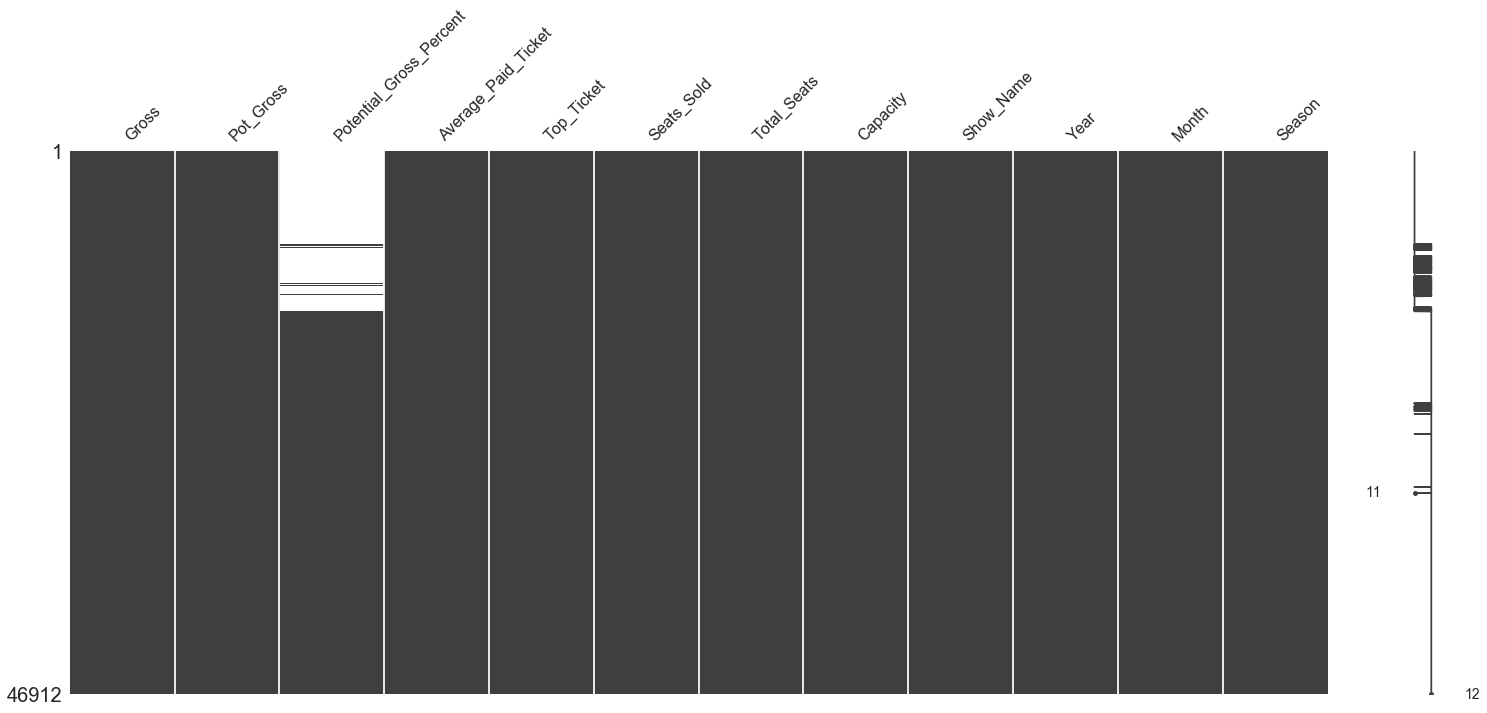

In [627]:
msno.matrix(broadway_gross.iloc[:,0:])

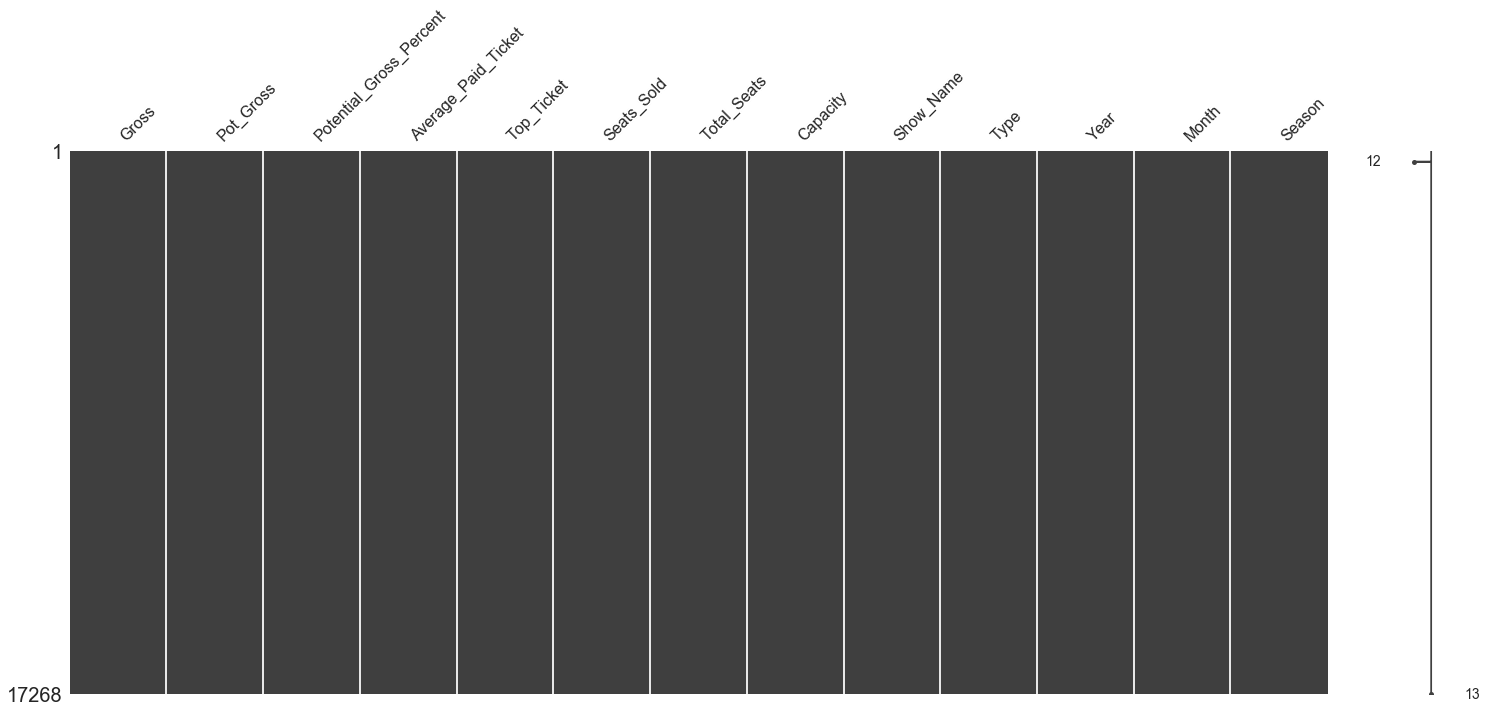

In [628]:

msno.matrix(broadway_df.iloc[:,0:])

In [685]:
broadway_df['Potential_Gross_Percent'].fillna(0, inplace=True)

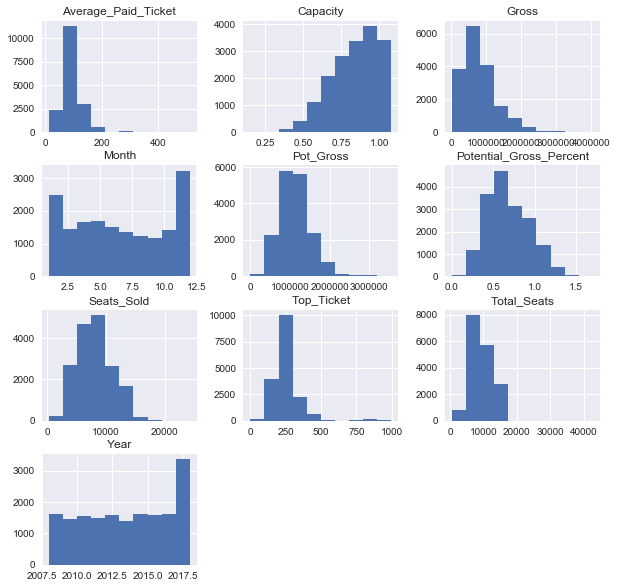

In [687]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
broadway_df.hist(ax = ax);

Text(0.5, 1.0, 'Correlation Heatmap')

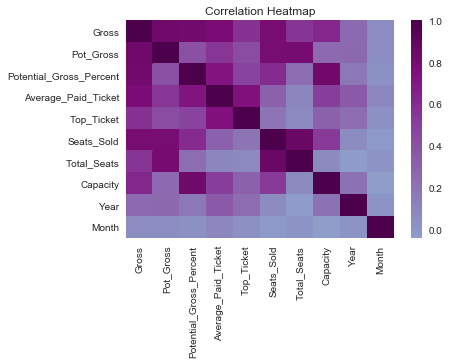

In [1082]:
import seaborn as sns
ax=sns.heatmap(broadway_df.corr(),cmap="BuPu", center=0);
ax.set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Plot')

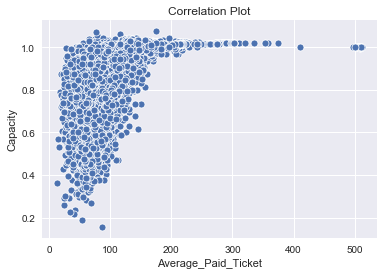

In [908]:
ax=sns.scatterplot(x="Average_Paid_Ticket", y="Capacity", data=broadway_df)
ax.set_title("Correlation Plot")

In [1077]:
broadway_df.corr()

Gross  Pot_Gross  Potential_Gross_Percent  \
Gross                    1.000000   0.826644                 0.815651   
Pot_Gross                0.826644   1.000000                 0.413203   
Potential_Gross_Percent  0.815651   0.413203                 1.000000   
Average_Paid_Ticket      0.780614   0.551113                 0.723371   
Top_Ticket               0.572648   0.437010                 0.490203   
Seats_Sold               0.790263   0.791184                 0.605834   
Total_Seats              0.558226   0.797014                 0.241879   
Capacity                 0.628442   0.262322                 0.827162   
Year                     0.265331   0.275781                 0.177343   
Month                    0.048764   0.051572                 0.027572   

                         Average_Paid_Ticket  Top_Ticket  Seats_Sold  \
Gross                               0.780614    0.572648    0.790263   
Pot_Gross                           0.551113    0.437010    0.791184   
Potential_Gross_Percent             0.723371    0.490203    0.605834   
Average_Paid_Ticket                 1.000000    0.744617    0.317996   
Top_Ticket                          0.744617    1.000000    0.199010   
Seats_Sold                          0.317996    0.199010    1.000000   
Total_Seats                         0.091623    0.078388    0.862262   
Capacity                            0.522192    0.309823    0.538856   
Year                                0.353618    0.236127    0.060369   
Month                               0.080534    0.035347   -0.016220   

                         Total_Seats  Capacity      Year     Month  
Gross                       0.558226  0.628442  0.265331  0.048764  
Pot_Gross                   0.797014  0.262322  0.275781  0.051572  
Potential_Gross_Percent     0.241879  0.827162  0.177343  0.027572  
Average_Paid_Ticket         0.091623  0.522192  0.353618  0.080534  
Top_Ticket                  0.078388  0.309823  0.236127  0.035347  
Seats_Sold                  0.862262  0.538856  0.060369 -0.016220  
Total_Seats                 1.000000  0.066589 -0.034802  0.006415  
Capacity                    0.066589  1.000000  0.212051 -0.041524  
Year                       -0.034802  0.212051  1.000000  0.011763  
Month                       0.006415 -0.041524  0.011763  1.000000

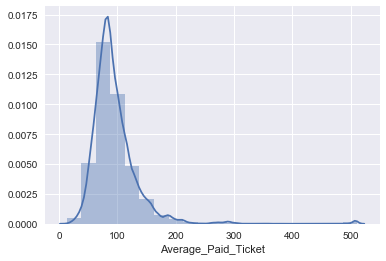

In [691]:
ax = sns.distplot(broadway_df['Average_Paid_Ticket'], bins=20)

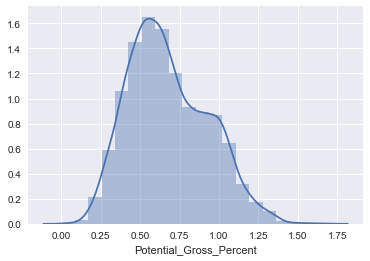

In [692]:
ax = sns.distplot(broadway_df['Potential_Gross_Percent'], bins=20)

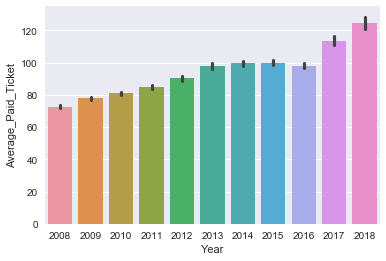

In [693]:
ax = sns.barplot(x="Year", y="Average_Paid_Ticket",data=broadway_df)

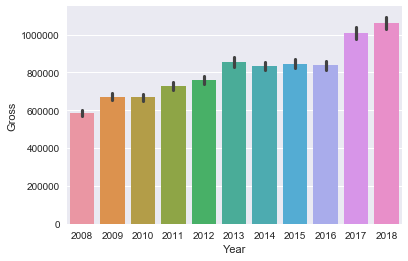

In [694]:
ax = sns.barplot(x="Year", y="Gross",data=broadway_df)

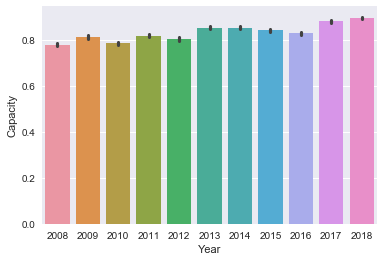

In [695]:
ax = sns.barplot(x="Year", y="Capacity",data=broadway_df)

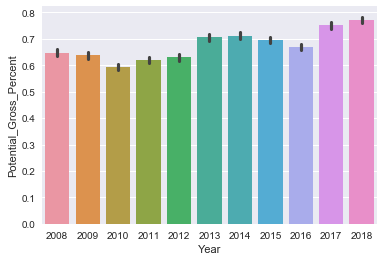

In [696]:
ax = sns.barplot(x="Year", y="Potential_Gross_Percent",data=broadway_df)

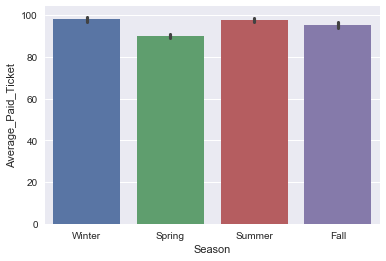

In [697]:
ax = sns.barplot(x="Season", y="Average_Paid_Ticket",data=broadway_df)

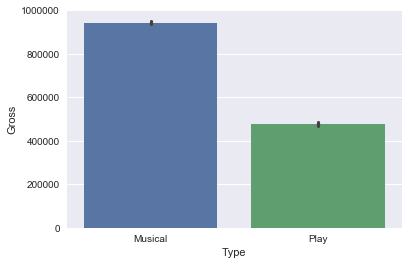

In [698]:
ax = sns.barplot(x="Type", y="Gross",data=broadway_df)

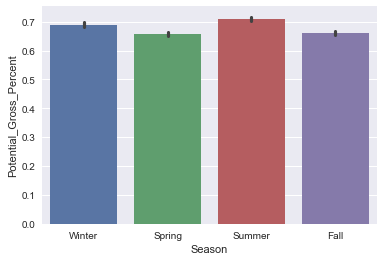

In [699]:
ax = sns.barplot(x="Season", y="Potential_Gross_Percent",data=broadway_df)

Text(0.5, 1.0, 'Correlation Plot')

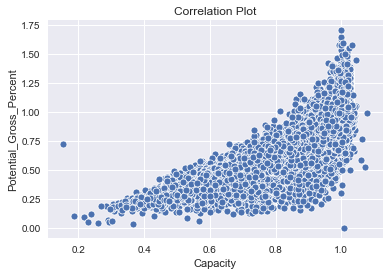

In [1080]:
ax = sns.scatterplot(x="Capacity", y="Potential_Gross_Percent", data=broadway_df)
ax.set_title("Correlation Plot")

In [702]:
broadway_df.corr()

Gross  Pot_Gross  Potential_Gross_Percent  \
Gross                    1.000000   0.826644                 0.815651   
Pot_Gross                0.826644   1.000000                 0.413203   
Potential_Gross_Percent  0.815651   0.413203                 1.000000   
Average_Paid_Ticket      0.780614   0.551113                 0.723371   
Top_Ticket               0.572648   0.437010                 0.490203   
Seats_Sold               0.790263   0.791184                 0.605834   
Total_Seats              0.558226   0.797014                 0.241879   
Capacity                 0.628442   0.262322                 0.827162   
Year                     0.265331   0.275781                 0.177343   
Month                    0.048764   0.051572                 0.027572   

                         Average_Paid_Ticket  Top_Ticket  Seats_Sold  \
Gross                               0.780614    0.572648    0.790263   
Pot_Gross                           0.551113    0.437010    0.791184   
Potential_Gross_Percent             0.723371    0.490203    0.605834   
Average_Paid_Ticket                 1.000000    0.744617    0.317996   
Top_Ticket                          0.744617    1.000000    0.199010   
Seats_Sold                          0.317996    0.199010    1.000000   
Total_Seats                         0.091623    0.078388    0.862262   
Capacity                            0.522192    0.309823    0.538856   
Year                                0.353618    0.236127    0.060369   
Month                               0.080534    0.035347   -0.016220   

                         Total_Seats  Capacity      Year     Month  
Gross                       0.558226  0.628442  0.265331  0.048764  
Pot_Gross                   0.797014  0.262322  0.275781  0.051572  
Potential_Gross_Percent     0.241879  0.827162  0.177343  0.027572  
Average_Paid_Ticket         0.091623  0.522192  0.353618  0.080534  
Top_Ticket                  0.078388  0.309823  0.236127  0.035347  
Seats_Sold                  0.862262  0.538856  0.060369 -0.016220  
Total_Seats                 1.000000  0.066589 -0.034802  0.006415  
Capacity                    0.066589  1.000000  0.212051 -0.041524  
Year                       -0.034802  0.212051  1.000000  0.011763  
Month                       0.006415 -0.041524  0.011763  1.000000

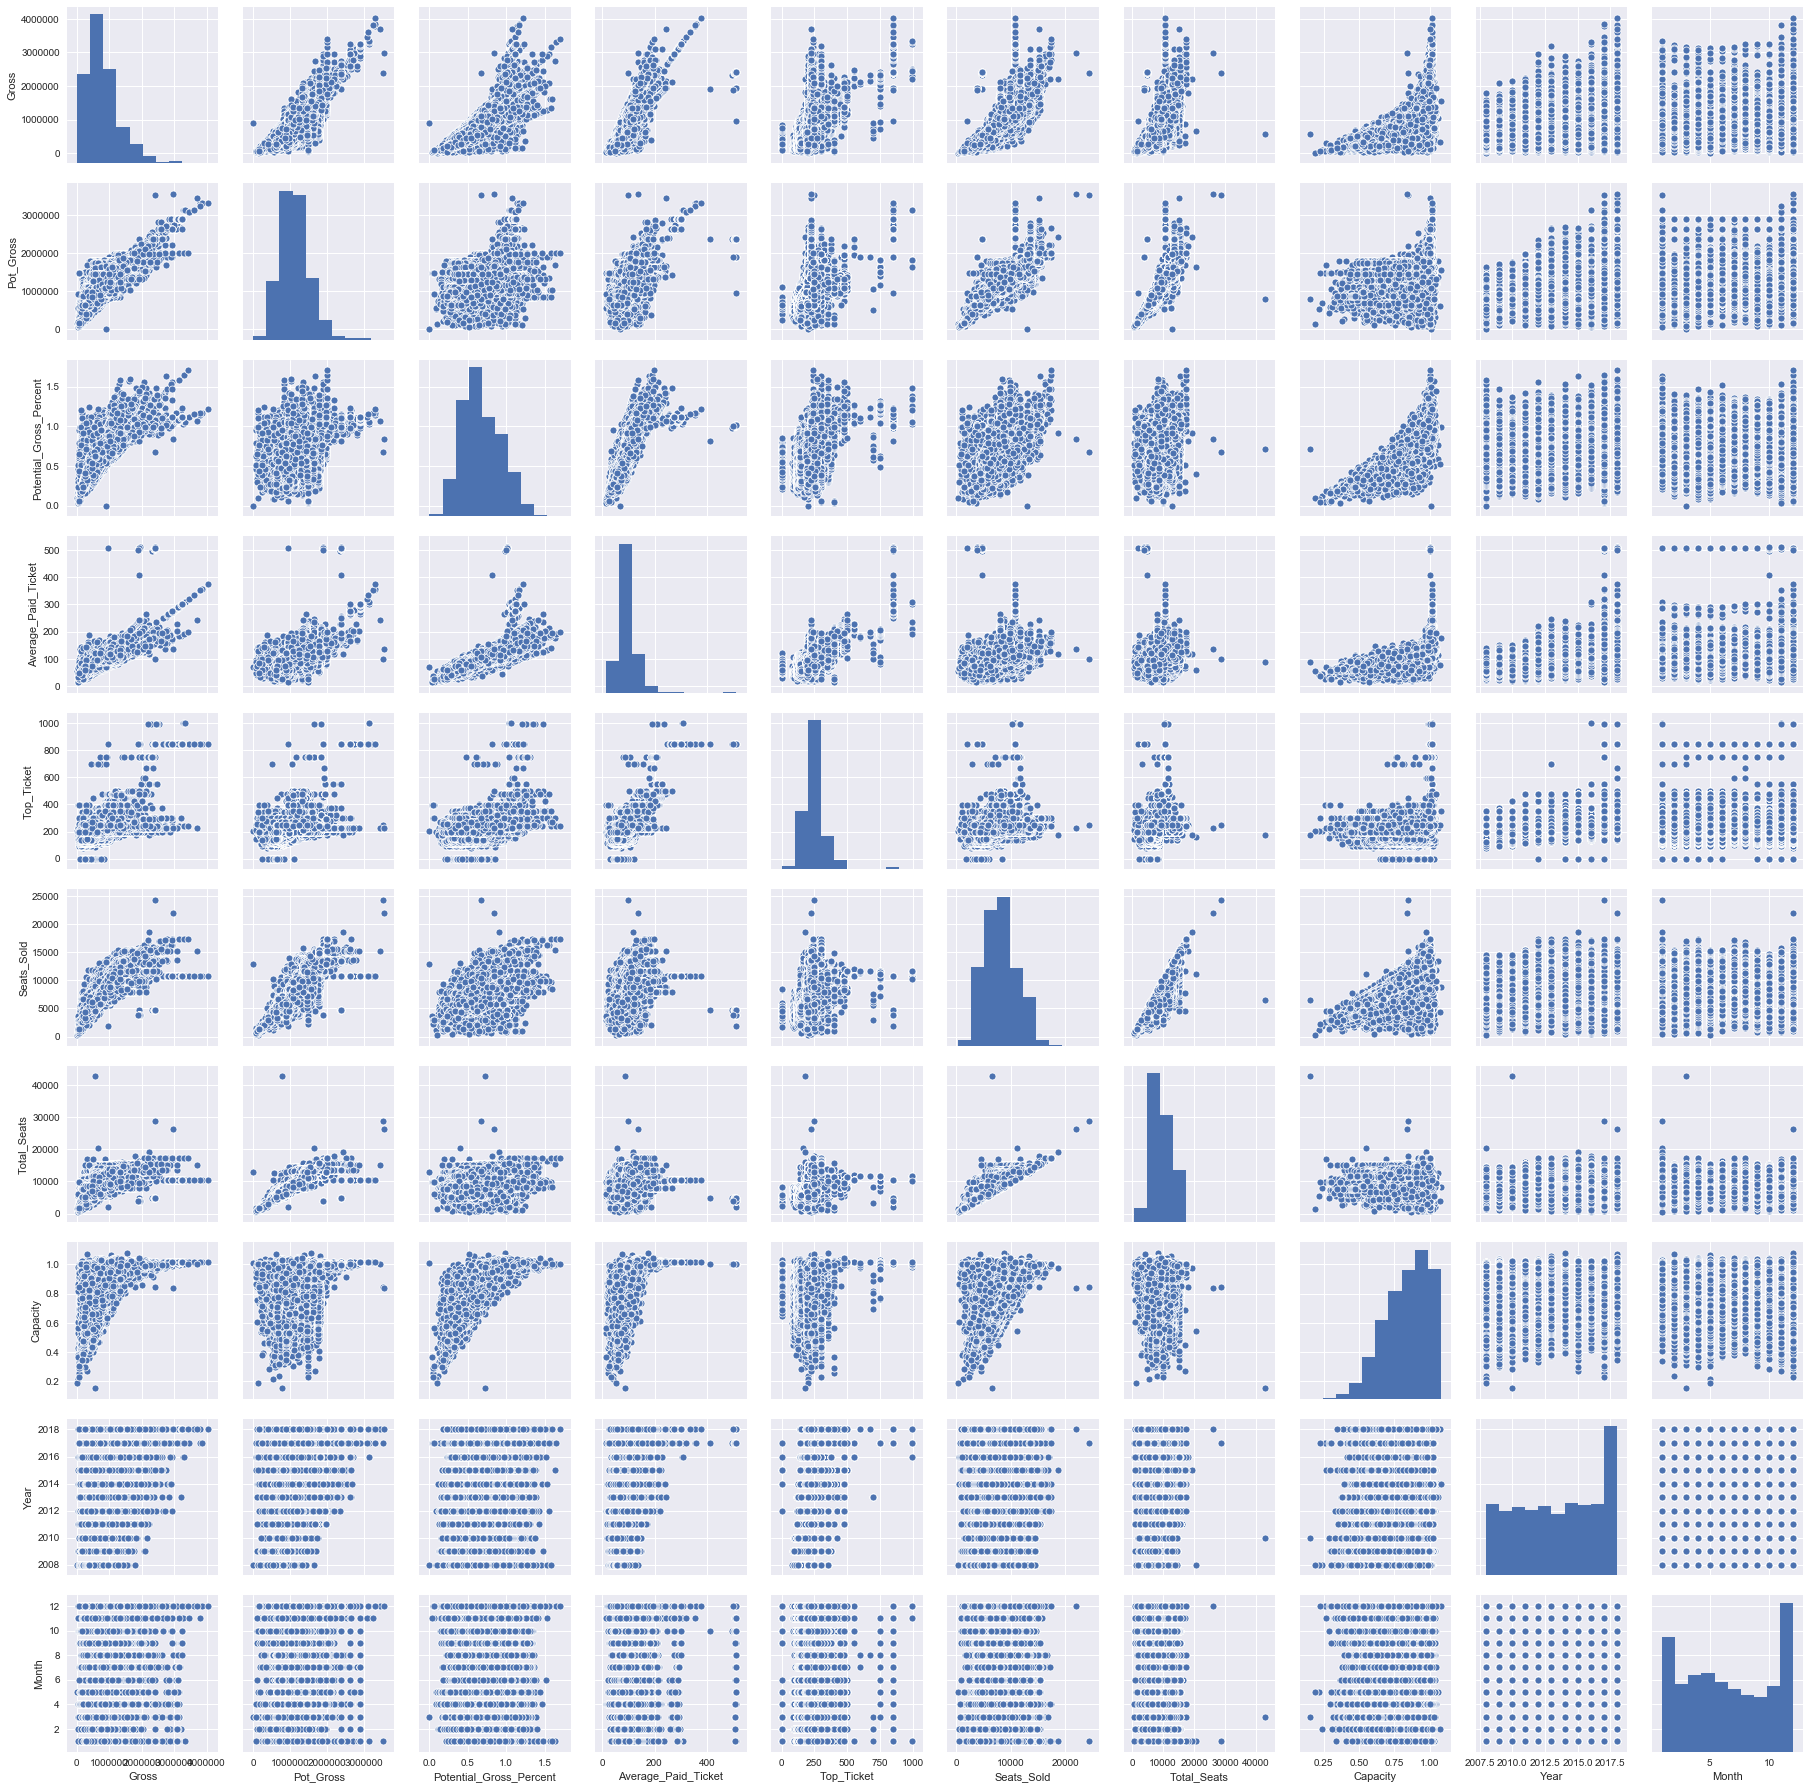

In [703]:
sns.pairplot(broadway_df)

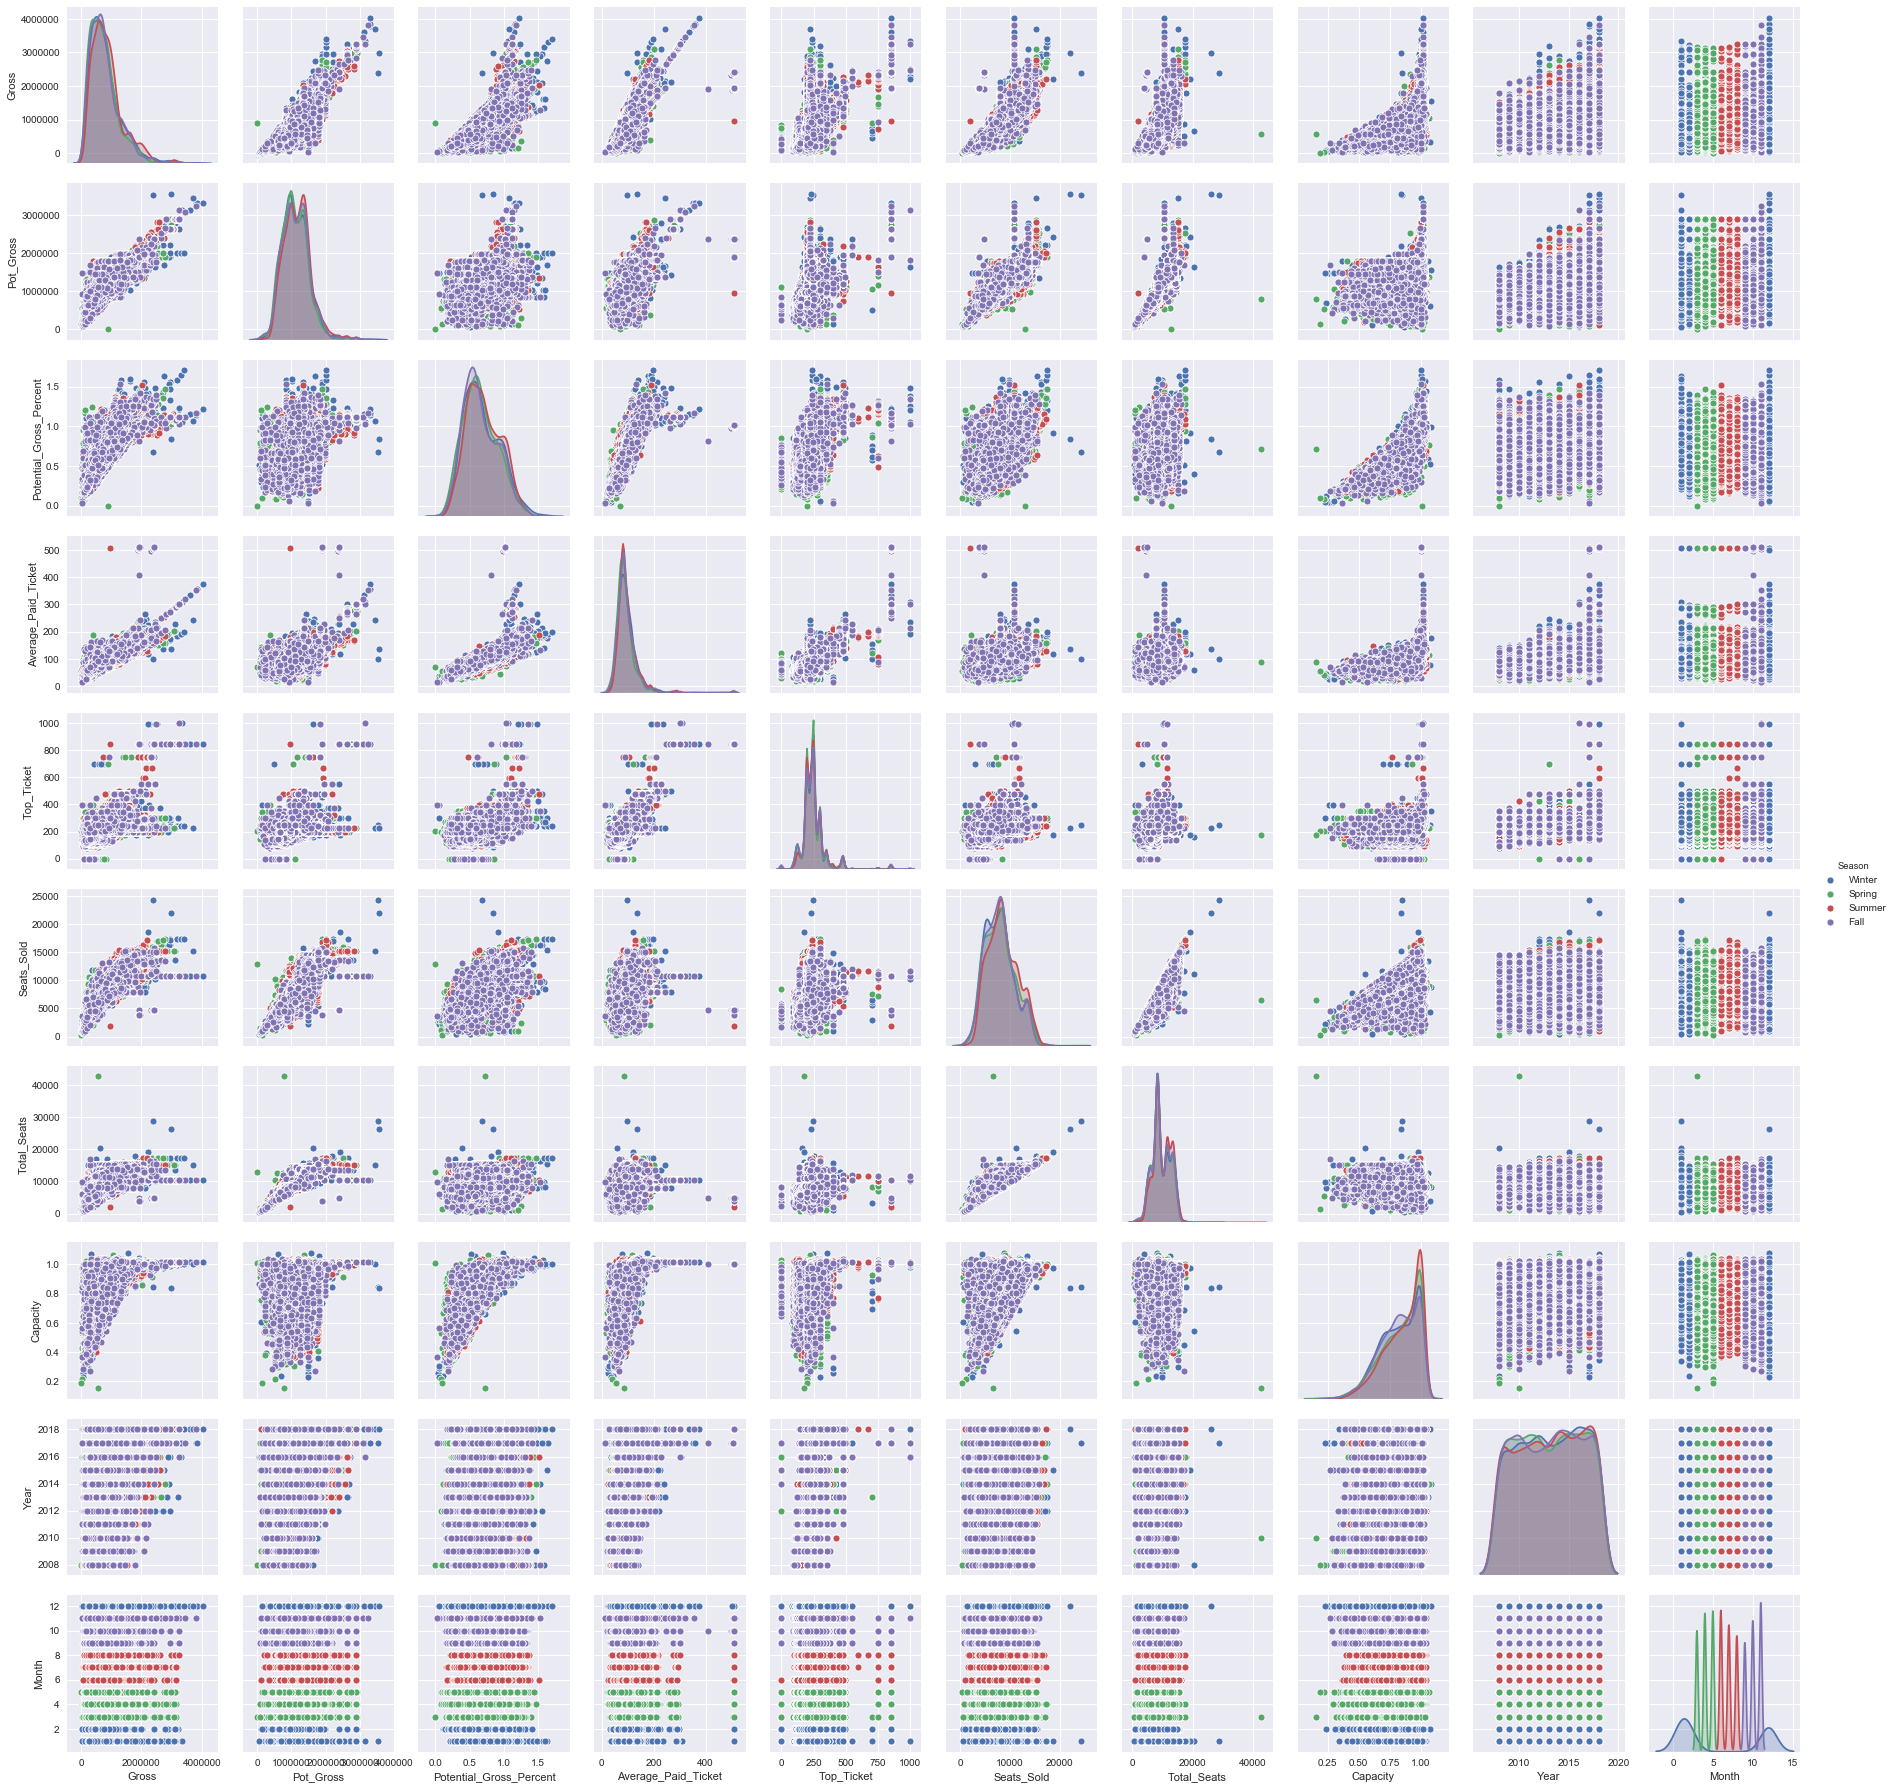

In [704]:
sns.pairplot(broadway_df,hue="Season")

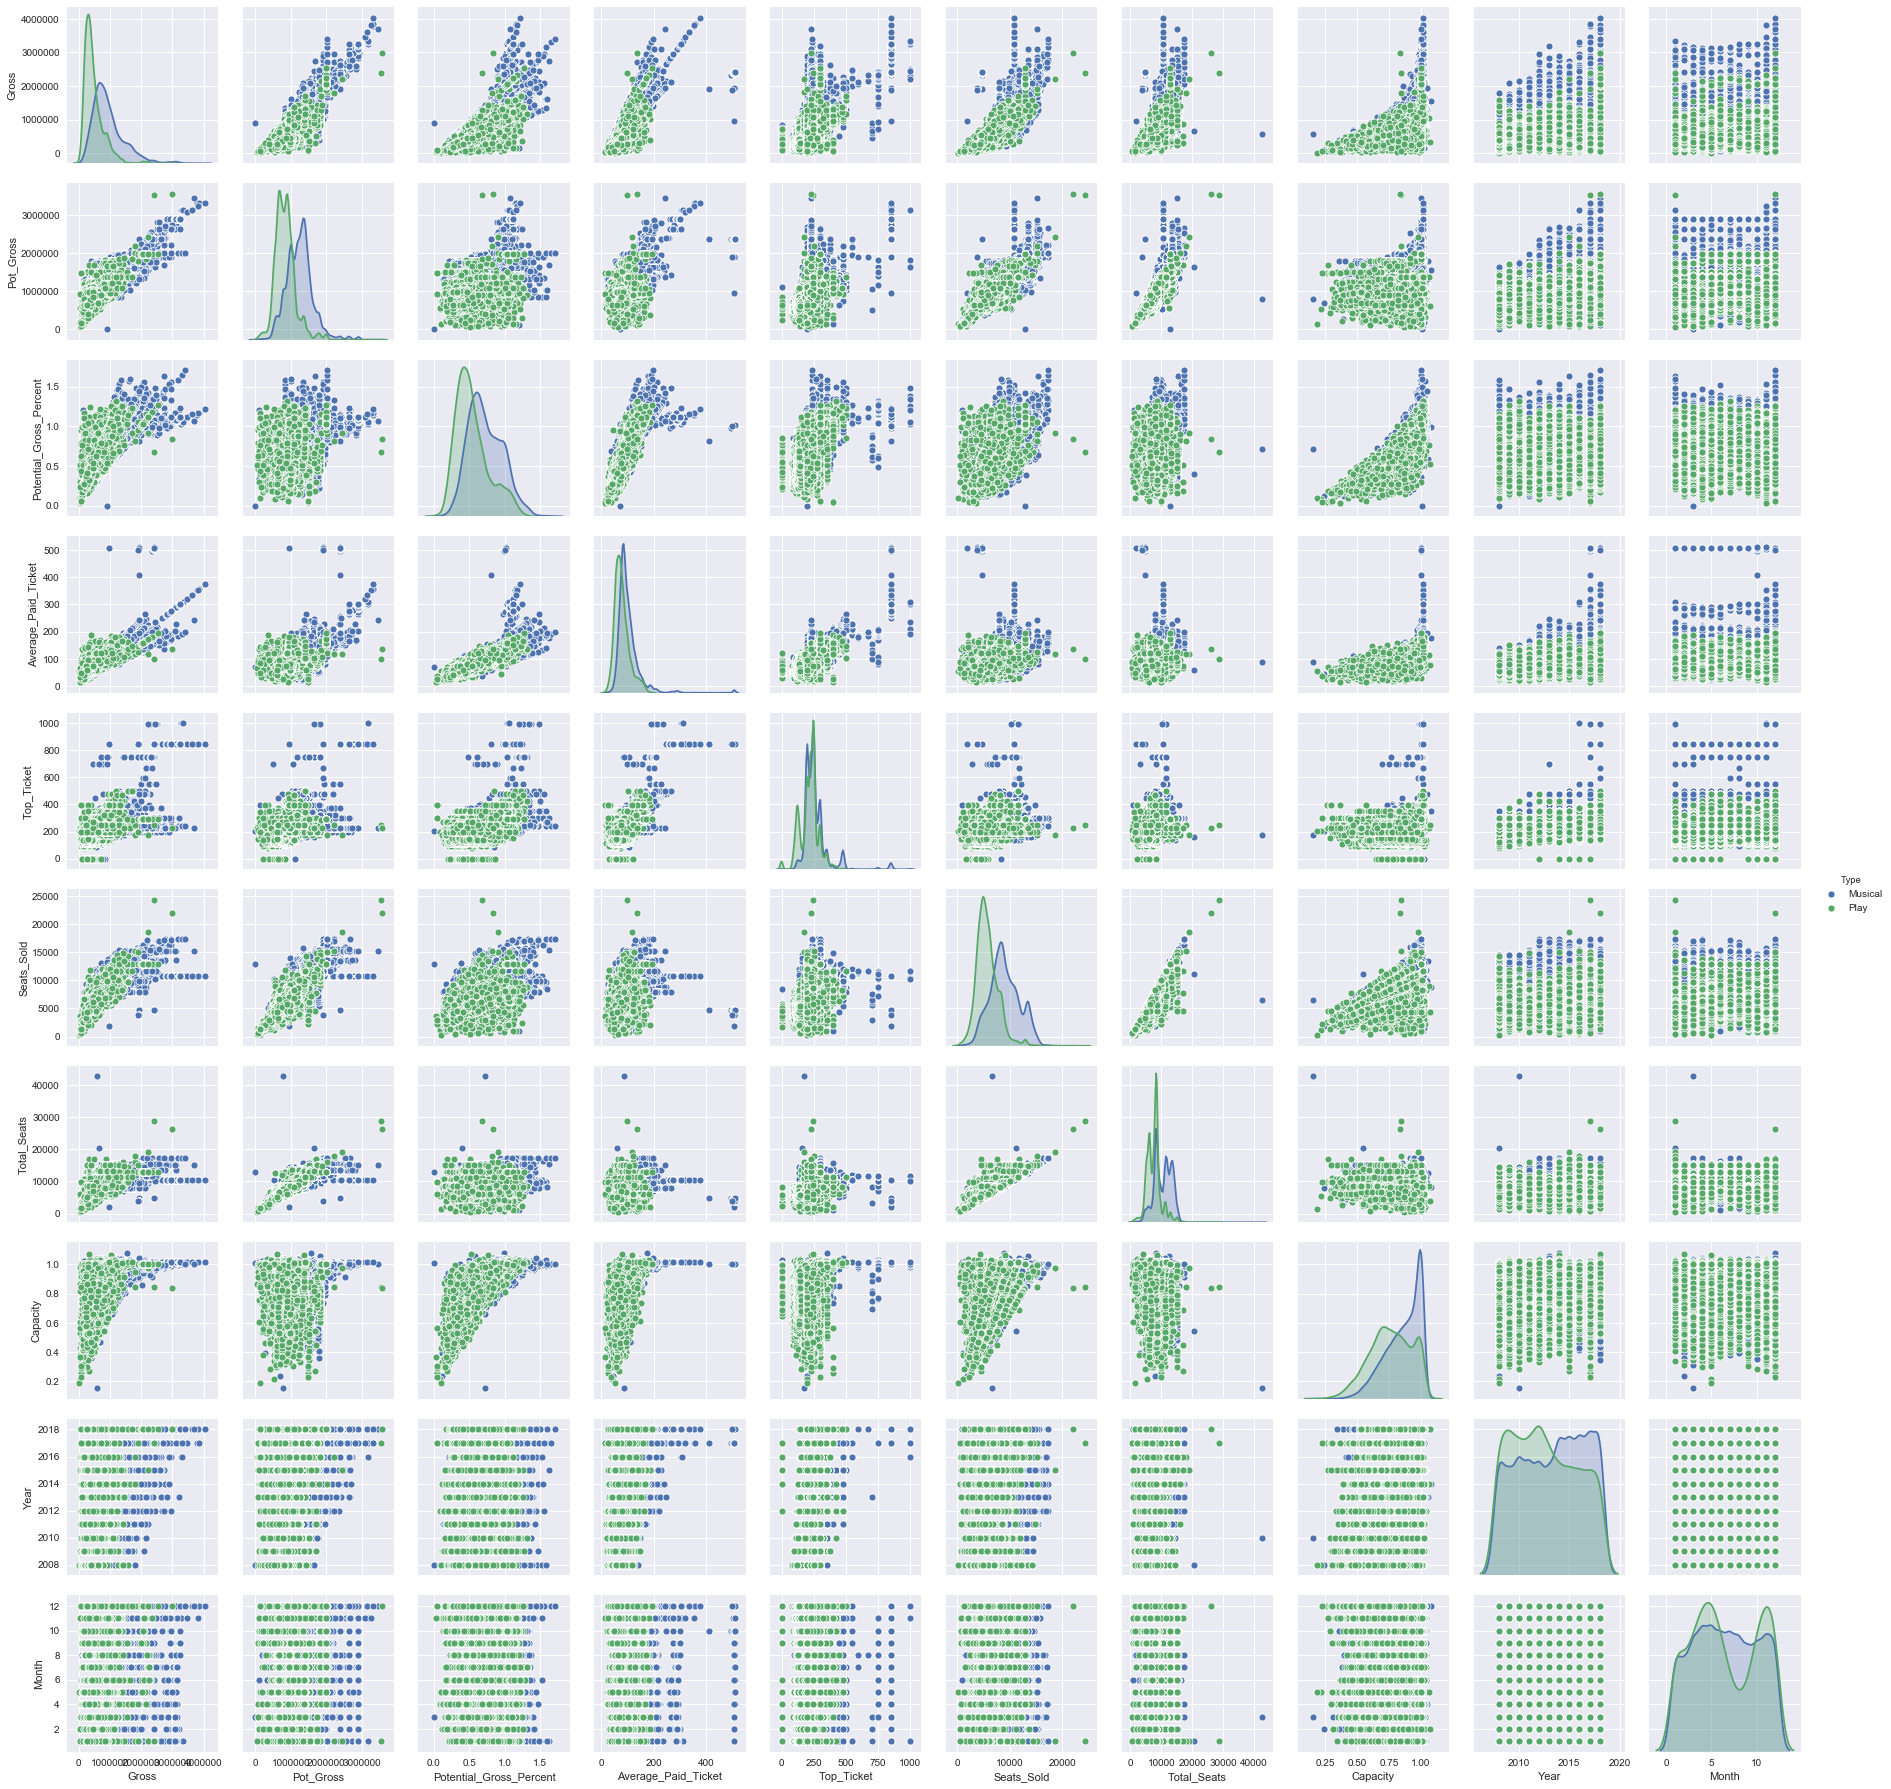

In [705]:
sns.pairplot(broadway_df,hue="Type")

In [706]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  
Week                                  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter

In [707]:
broadway_df.shape

(17268, 13)

In [708]:
broadway_gross.describe()

Gross     Pot_Gross  Potential_Gross_Percent  \
count  4.691200e+04  4.691200e+04             33339.000000   
mean   5.529906e+05  6.589295e+05                 0.680584   
std    4.273087e+05  5.437220e+05                 0.243813   
min    1.037000e+03  0.000000e+00                 0.029000   
25%    2.500030e+05  0.000000e+00                 0.500700   
50%    4.562905e+05  6.694900e+05                 0.657300   
75%    7.289208e+05  1.033311e+06                 0.855150   
max    4.041493e+06  3.559306e+06                 2.570500   

       Average_Paid_Ticket    Top_Ticket    Seats_Sold   Total_Seats  \
count         46912.000000  46912.000000  46912.000000  46912.000000   
mean             57.132996    139.353540   7882.826910   7378.559558   
std              46.114750    124.194466   3239.049246   5000.057395   
min               0.000000      0.000000     24.000000      0.000000   
25%               0.000000     45.000000   5384.750000   1635.750000   
50%              58.080000    100.000000   7714.000000   8376.000000   
75%              82.510000    240.000000  10194.000000  11496.000000   
max             511.580000    998.000000  93680.000000  55096.000000   

           Capacity          Year         Month  
count  46912.000000  46912.000000  46912.000000  
mean       0.613883   2002.956386      6.529310  
std        0.379177      9.885800      3.461115  
min        0.000000   1984.000000      1.000000  
25%        0.291750   1995.000000      4.000000  
50%        0.760000   2004.000000      6.000000  
75%        0.920000   2011.000000     10.000000  
max        2.774000   2019.000000     12.000000

In [709]:
broadway_df.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  
Week                                  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter  
1/6/08  Musical  2008      1  Winter

In [710]:
type_dummy = pd.get_dummies(broadway_df['Type'],prefix = 'Type')
type_dummy.tail(10)

Type_Musical  Type_Play
Week                             
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             1          0
12/30/18             0          1

In [711]:
season_dummy = pd.get_dummies(broadway_df['Season'],prefix = 'Season')
season_dummy.head()

Season_Fall  Season_Spring  Season_Summer  Season_Winter
Week                                                            
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1
1/6/08            0              0              0              1

In [712]:
broadway_df_dummies = pd.concat([broadway_df, type_dummy, season_dummy], axis = 1) #combining along the columns
broadway_df_dummies.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972     919903                   0.8261                71.70   
1/6/08   343967     672857                   0.5112                58.13   
1/6/08   646678     801792                   0.8065                77.37   
1/6/08   878076     853969                   1.0282                96.79   
1/6/08  1130940    1036499                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

           Type  Year  Month  Season  Type_Musical  Type_Play  Season_Fall  \
Week                                                                         
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   
1/6/08  Musical  2008      1  Winter             1          0            0   

        Season_Spring  Season_Summer  Season_Winter  
Week                                                 
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1  
1/6/08              0              0              1

In [713]:
broadway_df_dummies=broadway_df_dummies.drop(columns=['Type','Month','Season'])

In [885]:
mlr_model = ols(formula='Capacity~Average_Paid_Ticket', data=broadway_df_dummies).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     6473.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:57:47   Log-Likelihood:                 10983.
No. Observations:               17268   AIC:                        -2.196e+04
Df Residuals:                   17266   BIC:                        -2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6520      0.002    265.278      0.000       0.647       0.657
Average_Paid_Ticket     0.0019   2.37e-05     80.457      0.000       0.002       0.002
==============================================================================
Omnibus:                     2540.297   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4222.812
Skew:                          -0.993   Prob(JB):                         0.00
Kurtosis:                       4.389   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [715]:
mlr_model2 = ols(formula='Capacity~Average_Paid_Ticket+Pot_Gross+Top_Ticket+Total_Seats', data=broadway_df_dummies).fit()
mlr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     1823.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:10:25   Log-Likelihood:                 11276.
No. Observations:               17268   AIC:                        -2.254e+04
Df Residuals:                   17263   BIC:                        -2.250e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6355      0.004    142.270      0.000       0.627       0.644
Average_Paid_Ticket     0.0028   4.53e-05     62.532      0.000       0.003       0.003
Pot_Gross           -1.034e-07   6.66e-09    -15.527      0.000   -1.16e-07   -9.03e-08
Top_Ticket             -0.0003    1.5e-05    -17.333      0.000      -0.000      -0.000
Total_Seats          1.145e-05   7.45e-07     15.374      0.000    9.99e-06    1.29e-05
==============================================================================
Omnibus:                     3437.558   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8114.999
Skew:                          -1.121   Prob(JB):                         0.00
Kurtosis:                       5.500   Cond. No.                     5.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [911]:
mlr_model3 = ols(formula='Capacity~Average_Paid_Ticket+Pot_Gross+Top_Ticket+Total_Seats+Type_Musical+Season_Spring+Season_Summer', data=broadway_df_dummies).fit()
mlr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     1250.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:22:49   Log-Likelihood:                 11774.
No. Observations:               17268   AIC:                        -2.353e+04
Df Residuals:                   17260   BIC:                        -2.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6334      0.005    140.111      0.000       0.625       0.642
Average_Paid_Ticket     0.0027   4.46e-05     60.195      0.000       0.003       0.003
Pot_Gross           -1.039e-07   6.49e-09    -16.017      0.000   -1.17e-07   -9.12e-08
Top_Ticket             -0.0003    1.5e-05    -17.484      0.000      -0.000      -0.000
Total_Seats          6.756e-06   7.43e-07      9.091      0.000     5.3e-06    8.21e-06
Type_Musical            0.0678      0.002     28.453      0.000       0.063       0.072
Season_Spring           0.0279      0.002     12.546      0.000       0.024       0.032
Season_Summer           0.0288      0.002     12.316      0.000       0.024       0.033
==============================================================================
Omnibus:                     3189.854   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7409.205
Skew:                          -1.052   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     5.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [875]:
pred_val = mlr_model3.fittedvalues.copy()
true_val = broadway_df_dummies['Capacity'].values.copy()
residual = true_val - pred_val

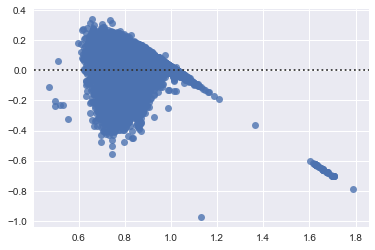

In [876]:
sns.residplot(pred_val,true_val)

((array([-3.94356414, -3.72558211, -3.60622504, ...,  3.60622504,
          3.72558211,  3.94356414]),
  array([-0.97490907, -0.79133528, -0.70551034, ...,  0.31623437,
          0.33695706,  0.34066835])),
 (0.11880118412611489, -9.341777702106694e-13, 0.9725611753635262))

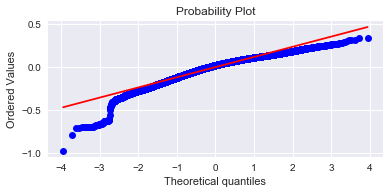

In [867]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)

In [717]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [926]:
broadway_df_dummies.head(5)

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972   919903.0                   0.8261                71.70   
1/6/08   343967   672857.0                   0.5112                58.13   
1/6/08   646678   801792.0                   0.8065                77.37   
1/6/08   878076   853969.0                   1.0282                96.79   
1/6/08  1130940  1036499.0                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

        Year  Type_Musical  Type_Play  Season_Fall  Season_Spring  \
Week                                                                
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   

        Season_Summer  Season_Winter  
Week                                  
1/6/08              0              1  
1/6/08              0              1  
1/6/08              0              1  
1/6/08              0              1  
1/6/08              0              1

In [924]:
sklearnmodel.predict(np.array([[broadway_df_dummies.Average_Paid_Ticket, broadway_df_dummies.Top_Ticket, broadway_df_dummies.Total_Seats, broadway_df_dummies.Type_Musical,broadway_df_dummies.Type_Play, broadway_df_dummies.Season_Fall,broadway_df_dummies.Season_Spring,broadway_df_dummies.Season_Summer,broadway_df_dummies.Season_Winter]]))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [1083]:
x=broadway_df_dummies[['Average_Paid_Ticket','Pot_Gross','Top_Ticket','Total_Seats','Type_Musical','Type_Play','Season_Fall','Season_Spring','Season_Summer','Season_Winter']]
y=broadway_df_dummies.Capacity

sklearnmodel = LinearRegression(fit_intercept=True).fit(x, y)
r_squared = sklearnmodel.score(x, y)


predict = sklearnmodel.predict(np.array([[58.13,672857, 200, 8267, 1, 0,0,0,0,1]])) 


print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [ 2.68871543e-03 -1.04312464e-07 -2.62566659e-04  6.80305582e-06
  3.38353331e-02 -3.38353331e-02 -1.22280263e-02  1.37116611e-02
  1.46625178e-02 -1.61461525e-02]
R2:  0.3364334082168071
Prediction:  [0.78875073]


# Make the data look more normal

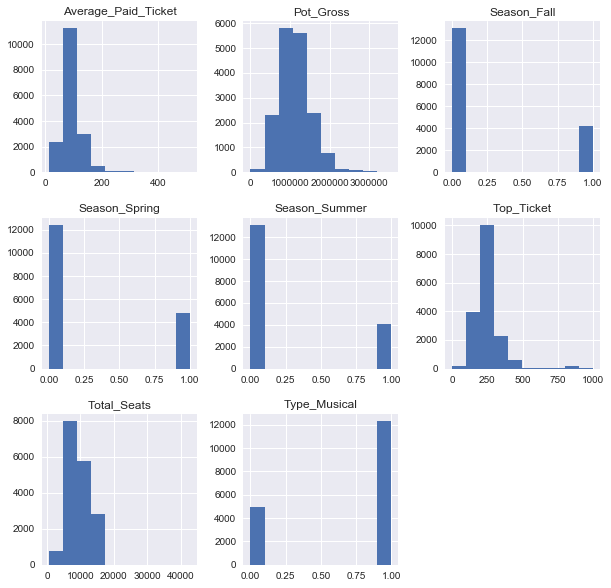

In [719]:
x.hist(figsize  = [10, 10]);

In [768]:
broadway_df_dummies['Pot_Gross'].mean()

1134114.5710562891

In [774]:
broadway_df_dummies['Top_Ticket'].mean()

249.66589529766046

In [778]:
broadway_df_dummies[broadway_df_dummies['Top_Ticket']==249.66589529766046]

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                        
1/29/12   205987   569648.0                   0.3616                42.48   
3/18/12   158537   508406.0                   0.3118                41.37   
9/14/14   198383   518000.0                   0.3830                53.56   
9/21/14   230242   592000.0                   0.3889                53.27   
9/28/14   225325   592000.0                   0.3806                45.73   
10/5/14   196922   518000.0                   0.3802                41.26   
10/5/14   264607   397970.0                   0.6649                78.71   
10/12/14  268583   592000.0                   0.4537                62.86   
10/12/14  462063   639264.0                   0.7228                83.90   
10/19/14  253441   592000.0                   0.4281                64.44   
10/19/14  475917   639264.0                   0.7445                84.68   
10/26/14  446622   639264.0                   0.6987                77.23   
10/26/14  250259   592000.0                   0.4227                65.67   
11/2/14   433827   559356.0                   0.7756                75.25   
11/2/14   217819   592000.0                   0.3679                61.10   
11/9/14   490862   639264.0                   0.7679                84.30   
11/9/14   209004   592000.0                   0.3530                56.15   
11/16/14  187209   592000.0                   0.3162                51.42   
11/16/14  455145   639264.0                   0.7120                82.57   
11/23/14  475879   639264.0                   0.7444                87.46   
11/23/14  146741   550057.0                   0.2668                42.67   
11/30/14  451370   639264.0                   0.7061                86.47   
12/7/14   458860   639264.0                   0.7178                85.10   
12/14/14  456725   639264.0                   0.7145                82.91   
12/21/14  445978   639264.0                   0.6976                82.67   
12/21/14  325875   679684.0                   0.4795                82.44   
12/28/14  384388   679684.0                   0.5655                93.00   
12/28/14  434148   639264.0                   0.6791                78.51   
1/4/15    478445   679684.0                   0.7039                94.93   
1/4/15    462361   559356.0                   0.8266                89.24   
...          ...        ...                      ...                  ...   
3/22/15   814492  1113680.0                   0.7314                97.94   
3/29/15   776946  1113680.0                   0.6976                92.75   
4/5/15    828367  1113680.0                   0.7438                98.90   
4/5/15     90799   442026.0                   0.2054                34.67   
4/12/15   143150   589368.0                   0.2429                37.42   
4/12/15   761311  1113680.0                   0.6836                90.89   
4/19/15   144334   589368.0                   0.2449                31.68   
4/26/15   126468   539616.0                   0.2344                29.08   
5/3/15    157029   448904.0                   0.3498                45.93   
5/10/15   175953   489864.0                   0.3592                48.77   
5/17/15   180476   489864.0                   0.3684                50.26   
5/24/15   172882   489864.0                   0.3529                48.45   
5/31/15   160888   489864.0                   0.3284                46.19   
6/7/15    169126   489864.0                   0.3453                45.83   
9/20/15   177278   495620.0                   0.3577                56.19   
9/20/15   233302   393550.0                   0.5928                73.48   
9/27/15   358413   629680.0                   0.5692                72.03   
9/27/15   239768   669360.0                   0.3582                59.61   
10/4/15   227826   528215.0                   0.4313                68.52   
10/4/15

In [771]:
broadway_df_dummies['Pot_Gross']=broadway_df_dummies['Pot_Gross'].replace(0,1134114.5710562891)

In [776]:
broadway_df_dummies['Top_Ticket']=broadway_df_dummies['Top_Ticket'].replace(0,249.66589529766046)

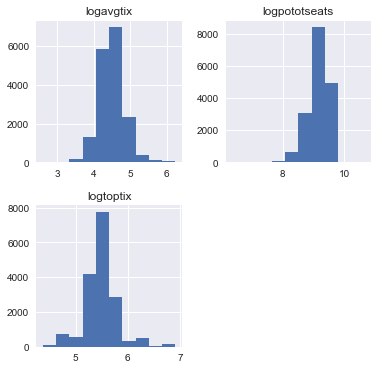

In [1034]:
data_log = pd.DataFrame([])
data_log["logavgtix"] = np.log(broadway_df_dummies['Average_Paid_Ticket'])
data_log["logpototseats"] = np.log(broadway_df_dummies['Total_Seats'])
data_log["logtoptix"] = np.log(broadway_df_dummies['Top_Ticket'])
data_log.hist(figsize  = [6, 6]);

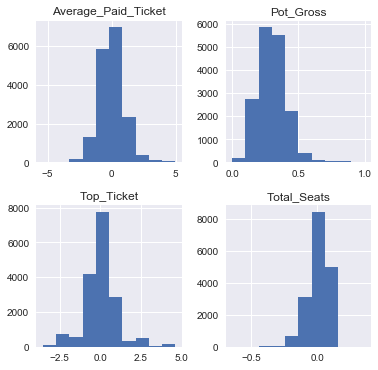

In [1035]:
Pot_Gross = broadway_df_dummies["Pot_Gross"]
logavgtix=data_log["logavgtix"]
logptotseats=data_log["logpototseats"] 
logtoptix=data_log["logtoptix"] 

scaled_Pot_Gross = (Pot_Gross-min(Pot_Gross))/(max(Pot_Gross)-min(Pot_Gross))
scaled_avgtix= (logavgtix-np.mean(logavgtix))/np.sqrt(np.var(logavgtix))
scaled_totseats = (logptotseats-np.mean(logptotseats))/(max(logptotseats)-min(logptotseats))
scaled_toptix= (logtoptix-np.mean(logtoptix))/np.sqrt(np.var(logtoptix))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["Pot_Gross"]= scaled_Pot_Gross
data_cont_scaled['Average_Paid_Ticket']= scaled_avgtix
data_cont_scaled["Total_Seats"] = scaled_totseats
data_cont_scaled["Top_Ticket"] = scaled_toptix

data_cont_scaled.hist(figsize  = [6, 6]);

In [1036]:
data_fin = pd.DataFrame([])
data_fin["Scaled_Pot_Gross"]= scaled_Pot_Gross
data_fin['Scaled_Average_Paid_Ticket']= scaled_avgtix
data_fin["Scaled_Total_Seats"] = scaled_totseats
data_fin["Scaled_Top_Ticket"] = scaled_toptix

data_fin.columns

Index(['Scaled_Pot_Gross', 'Scaled_Average_Paid_Ticket', 'Scaled_Total_Seats',
       'Scaled_Top_Ticket'],
      dtype='object')

In [1037]:
capacity = broadway_df_dummies['Capacity']
data_fin = pd.concat([broadway_df_dummies, data_fin], axis=1)

data_fin.columns

Index(['Gross', 'Pot_Gross', 'Potential_Gross_Percent', 'Average_Paid_Ticket',
       'Top_Ticket', 'Seats_Sold', 'Total_Seats', 'Capacity', 'Show_Name',
       'Year', 'Type_Musical', 'Type_Play', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Scaled_Pot_Gross',
       'Scaled_Average_Paid_Ticket', 'Scaled_Total_Seats',
       'Scaled_Top_Ticket'],
      dtype='object')

In [951]:
data_fin.head()

Gross  Pot_Gross  Potential_Gross_Percent  Average_Paid_Ticket  \
Week                                                                       
1/6/08   759972   919903.0                   0.8261                71.70   
1/6/08   343967   672857.0                   0.5112                58.13   
1/6/08   646678   801792.0                   0.8065                77.37   
1/6/08   878076   853969.0                   1.0282                96.79   
1/6/08  1130940  1036499.0                   1.0911                93.28   

        Top_Ticket  Seats_Sold  Total_Seats  Capacity           Show_Name  \
Week                                                                        
1/6/08      250.00       10599        13528     0.783      Legally Blonde   
1/6/08      200.00        5917         8267     0.716                Rent   
1/6/08      201.25        8358         8720     0.958    Spring Awakening   
1/6/08      251.25        9072         8976     1.011      Les Mis Rables   
1/6/08      251.50       12124        12024     1.008  The Little Mermaid   

        Year  Type_Musical  Type_Play  Season_Fall  Season_Spring  \
Week                                                                
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   
1/6/08  2008             1          0            0              0   

        Season_Summer  Season_Winter  Scaled_Pot_Gross  \
Week                                                     
1/6/08              0              1          0.244883   
1/6/08              0              1          0.174205   
1/6/08              0              1          0.211092   
1/6/08              0              1          0.226020   
1/6/08              0              1          0.278241   

        Scaled_Average_Paid_Ticket  Scaled_Total_Seats  Scaled_Top_Ticket  
Week                                                                       
1/6/08                   -0.613651            0.089686           0.157804  
1/6/08                   -1.210787           -0.024768          -0.559750  
1/6/08                   -0.397039           -0.012370          -0.539715  
1/6/08                    0.240329           -0.005645           0.173842  
1/6/08                    0.135200            0.062296           0.177040

((array([-3.94356414, -3.72558211, -3.60622504, ...,  3.60622504,
          3.72558211,  3.94356414]),
  array([-0.72407325, -0.55692541, -0.45367009, ...,  0.45221947,
          0.46349729,  0.50248992])),
 (0.1141991159426331, -1.3622910133179441e-15, 0.9903978480636754))

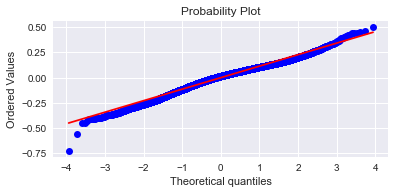

In [1084]:
pred_val = mlr_model4.fittedvalues.copy()
true_val = data_fin['Capacity'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)

# #

In [1038]:
y = data_fin[["Capacity"]]
X = data_fin.drop(columns=['Capacity','Show_Name','Gross','Potential_Gross_Percent','Seats_Sold','Year'], axis=1)

In [1039]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))
baseline

0.4158949774588589

In [1040]:
type_musical=data_fin[data_fin["Type_Musical"]==1]
type_play=data_fin[data_fin["Type_Play"]==1]


In [1041]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()

Average_Paid_Ticket_1 = type_musical["Average_Paid_Ticket"].values.reshape(-1, 1)
Average_Paid_Ticket_2 = type_play["Average_Paid_Ticket"].values.reshape(-1, 1)

regression_1.fit(Average_Paid_Ticket_1, type_musical["Capacity"])
regression_2.fit(Average_Paid_Ticket_2, type_play["Capacity"])

pred_1 = regression_1.predict(Average_Paid_Ticket_1)
pred_2 = regression_2.predict(Average_Paid_Ticket_2)

print(regression_1.coef_)
print(regression_2.coef_)

[0.0015371]
[0.00298708]


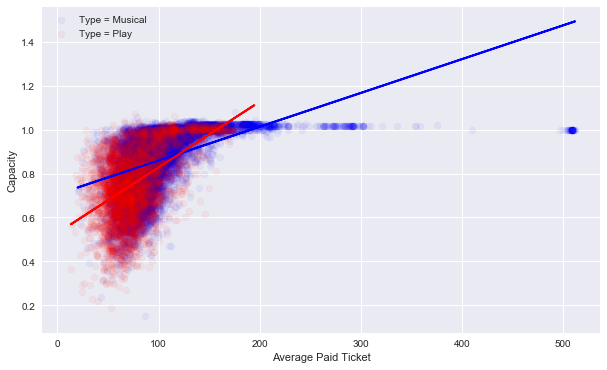

In [1042]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(Average_Paid_Ticket_1, type_musical["Capacity"],  color='blue', alpha = 0.05, label = "Type = Musical")
plt.scatter(Average_Paid_Ticket_2, type_play["Capacity"],  color='red', alpha = 0.05, label = "Type = Play")

plt.plot(Average_Paid_Ticket_1, pred_1,  color='blue', linewidth=2)
plt.plot(Average_Paid_Ticket_2, pred_2,  color='red', linewidth=2)
plt.ylabel("Capacity")
plt.xlabel("Average Paid Ticket")
plt.legend();

In [1043]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact["AverageTix_Type"] = X["Average_Paid_Ticket"] * X["Type_Musical"]

interact_AverageTix_Type = np.mean(cross_val_score(regression, X_interact, y, scoring="r2", cv=crossvalidation))
interact_AverageTix_Type

0.4163081097262076

In [1044]:
X_interact = sm.add_constant(X_interact)
model = sm.OLS(y,X_interact)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1029.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:11:08   Log-Likelihood:                 12895.
No. Observations:               17268   AIC:                        -2.576e+04
Df Residuals:                   17255   BIC:                        -2.566e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4588      0.008     54.401      0.000       0.442       0.475
Pot_Gross                  -6.988e-08   6.29e-09    -11.107      0.000   -8.22e-08   -5.75e-08
Average_Paid_Ticket           -0.0008      0.000     -6.766      0.000      -0.001      -0.001
Top_Ticket                     0.0001   3.91e-05      2.599      0.009    2.49e-05       0.000
Total_Seats                 1.414e-05   1.28e-06     11.087      0.000    1.16e-05    1.66e-05
Type_Musical                   0.2419      0.004     55.280      0.000       0.233       0.250
Type_Play                      0.2170      0.006     33.921      0.000       0.204       0.230
Season_Fall                    0.1030      0.003     39.288      0.000       0.098       0.108
Season_Spring                  0.1322      0.003     51.301      0.000       0.127       0.137
Season_Summer                  0.1277      0.003     49.368      0.000       0.123       0.133
Season_Winter                  0.0959      0.003     36.688      0.000       0.091       0.101
Scaled_Pot_Gross              -0.0084      0.000    -54.401      0.000      -0.009      -0.008
Scaled_Average_Paid_Ticket     0.1289      0.003     42.662      0.000       0.123       0.135
Scaled_Total_Seats            -0.5102      0.043    -11.961      0.000      -0.594      -0.427
Scaled_Top_Ticket             -0.0208      0.003     -6.533      0.000      -0.027      -0.015
AverageTix_Type                0.0003   7.63e-05      3.822      0.000       0.000       0.000
==============================================================================
Omnibus:                      869.280   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1268.672
Skew:                          -0.460   Prob(JB):                    3.25e-276
Kurtosis:                       3.958   Cond. No.                     2.29e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [979]:
season_fall=data_fin[data_fin["Season_Fall"]==1]
season_winter=data_fin[data_fin["Season_Winter"]==1]
season_spring=data_fin[data_fin["Season_Spring"]==1]
season_summer=data_fin[data_fin["Season_Summer"]==1]

In [980]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()
regression_4 = LinearRegression()

Average_Paid_Ticket_1 = season_fall["Average_Paid_Ticket"].values.reshape(-1, 1)
Average_Paid_Ticket_2 = season_winter["Average_Paid_Ticket"].values.reshape(-1, 1)
Average_Paid_Ticket_3 = season_spring["Average_Paid_Ticket"].values.reshape(-1, 1)
Average_Paid_Ticket_4 = season_summer["Average_Paid_Ticket"].values.reshape(-1, 1)



regression_1.fit(Average_Paid_Ticket_1, season_fall["Capacity"])
regression_2.fit(Average_Paid_Ticket_2, season_winter["Capacity"])
regression_3.fit(Average_Paid_Ticket_3, season_spring["Capacity"])
regression_4.fit(Average_Paid_Ticket_4, season_summer["Capacity"])

# Make predictions using the testing set
pred_1 = regression_1.predict(Average_Paid_Ticket_1)
pred_2 = regression_2.predict(Average_Paid_Ticket_2)
pred_3 = regression_2.predict(Average_Paid_Ticket_3)
pred_4 = regression_2.predict(Average_Paid_Ticket_4)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)
print(regression_4.coef_)

[0.00178654]
[0.0020007]
[0.00199254]
[0.00191748]


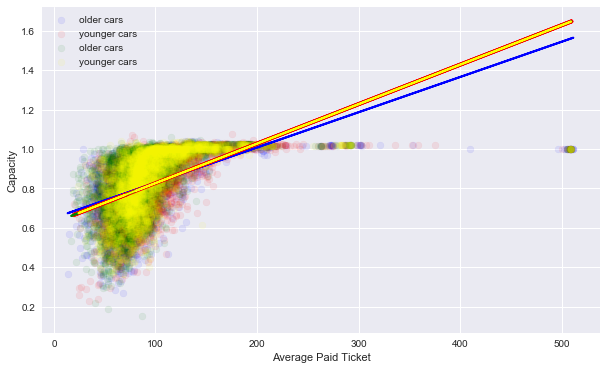

In [1005]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(Average_Paid_Ticket_1, season_fall["Capacity"],  color='blue', alpha = 0.08, label = "older cars")
plt.scatter(Average_Paid_Ticket_2, season_winter["Capacity"],  color='red', alpha = 0.08, label = "younger cars")
plt.scatter(Average_Paid_Ticket_3, season_spring["Capacity"],  color='green', alpha = 0.08, label = "older cars")
plt.scatter(Average_Paid_Ticket_4, season_summer["Capacity"],  color='yellow', alpha = 0.08, label = "younger cars")

plt.plot(Average_Paid_Ticket_1, pred_1,  color='blue', linewidth=2)
plt.plot(Average_Paid_Ticket_2, pred_2,  color='red', linewidth=4)
plt.plot(Average_Paid_Ticket_3, pred_3,  color='green', linewidth=2)
plt.plot(Average_Paid_Ticket_4, pred_4,  color='yellow', linewidth=2)

plt.ylabel("Capacity")
plt.xlabel("Average Paid Ticket")
plt.legend();

In [997]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact2 = X.copy()
X_interact2["AverageTix_Type"] = X["Average_Paid_Ticket"] * X["Season_Fall"]*X["Season_Spring"]*X["Season_Summer"]

interact_AverageTix_Type = np.mean(cross_val_score(regression, X_interact2, y, scoring="r2", cv=crossvalidation))
interact_AverageTix_Type

0.4155986534631957

In [999]:
X_interact_2 = sm.add_constant(X_interact2)
model = sm.OLS(y,X_interact2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1027.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:19:57   Log-Likelihood:                 12887.
No. Observations:               17268   AIC:                        -2.575e+04
Df Residuals:                   17255   BIC:                        -2.565e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Pot_Gross                  -5.957e-08   1.01e-08     -5.902      0.000   -7.94e-08   -3.98e-08
Average_Paid_Ticket           -0.0005   8.31e-05     -5.839      0.000      -0.001      -0.000
Top_Ticket                     0.0001   3.94e-05      2.997      0.003    4.08e-05       0.000
Total_Seats                 1.375e-05   1.31e-06     10.484      0.000    1.12e-05    1.63e-05
Year                          -0.0002      0.000     -0.611      0.541      -0.001       0.000
Type_Musical                   0.8216      0.452      1.817      0.069      -0.065       1.708
Type_Play                      0.7714      0.452      1.706      0.088      -0.115       1.658
Season_Fall                    0.3864      0.226      1.710      0.087      -0.057       0.830
Season_Spring                  0.4158      0.226      1.839      0.066      -0.027       0.859
Season_Summer                  0.4113      0.226      1.819      0.069      -0.032       0.854
Season_Winter                  0.3795      0.226      1.679      0.093      -0.064       0.823
Scaled_Pot_Gross              -0.0291      0.017     -1.762      0.078      -0.062       0.003
Scaled_Average_Paid_Ticket     0.1243      0.003     44.803      0.000       0.119       0.130
Scaled_Total_Seats            -0.5133      0.043    -12.006      0.000      -0.597      -0.429
Scaled_Top_Ticket             -0.0223      0.003     -6.933      0.000      -0.029      -0.016
AverageTix_Type                     0          0        nan        nan           0           0
==============================================================================
Omnibus:                      866.592   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1251.636
Skew:                          -0.462   Prob(JB):                    1.62e-272
Kurtosis:                       3.941   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1067]:
x=data_fin[['Type_Musical','Season_Fall','Season_Spring','Season_Summer','Scaled_Pot_Gross',
       'Scaled_Average_Paid_Ticket', 'Scaled_Total_Seats', 'Scaled_Top_Ticket']]
y=data_fin.Capacity

sklearnmodel = LinearRegression(fit_intercept=True).fit(x, y)
r_squared = sklearnmodel.score(x, y)



predict = sklearnmodel.predict(np.array([[1,0,0,0,data_fin.iloc[13413]['Scaled_Pot_Gross'],data_fin.iloc[13413]['Scaled_Average_Paid_Ticket'],data_fin.iloc[13413]['Scaled_Total_Seats'],data_fin.iloc[13413]['Scaled_Top_Ticket']]]))

print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [ 0.05340803  0.00668213  0.03587166  0.03137777 -0.20626161  0.10747671
 -0.04468059 -0.01645808]
R2:  0.41095249827131564
Prediction:  [0.86976781]


In [1066]:
data_fin.iloc[13413]

Gross                             993376
Pot_Gross                     1.4267e+06
Potential_Gross_Percent           0.6963
Average_Paid_Ticket               104.47
Top_Ticket                           197
Seats_Sold                          9509
Total_Seats                        11000
Capacity                           0.864
Show_Name                           Cats
Year                                2016
Type_Musical                           1
Type_Play                              0
Season_Fall                            1
Season_Spring                          0
Season_Summer                          0
Season_Winter                          0
Scaled_Pot_Gross                0.389875
Scaled_Average_Paid_Ticket      0.457646
Scaled_Total_Seats             0.0416106
Scaled_Top_Ticket              -0.608351
AverageTix_Type                   104.47
Name: 9/4/16, dtype: object

In [1072]:
x=data_fin[['Type_Musical','Season_Fall','Season_Spring','Season_Summer','Scaled_Pot_Gross',
       'Scaled_Average_Paid_Ticket', 'Scaled_Total_Seats', 'Scaled_Top_Ticket']]
y=data_fin.Capacity

sklearnmodel = LinearRegression(fit_intercept=True).fit(x, y)
r_squared = sklearnmodel.score(x, y)



predict = sklearnmodel.predict(np.array([[1,0,0,0,data_fin.iloc[1]['Scaled_Pot_Gross'],data_fin.iloc[1]['Scaled_Average_Paid_Ticket'],data_fin.iloc[1]['Scaled_Total_Seats'],data_fin.iloc[1]['Scaled_Top_Ticket']]]))

print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)
print("Prediction: ", predict)

Coefficients:  [ 0.05340803  0.00668213  0.03587166  0.03137777 -0.20626161  0.10747671
 -0.04468059 -0.01645808]
R2:  0.41095249827131564
Prediction:  [0.7371004]


In [1071]:
data_fin.iloc[1]

Gross                            343967
Pot_Gross                        672857
Potential_Gross_Percent          0.5112
Average_Paid_Ticket               58.13
Top_Ticket                          200
Seats_Sold                         5917
Total_Seats                        8267
Capacity                          0.716
Show_Name                          Rent
Year                               2008
Type_Musical                          1
Type_Play                             0
Season_Fall                           0
Season_Spring                         0
Season_Summer                         0
Season_Winter                         1
Scaled_Pot_Gross               0.174205
Scaled_Average_Paid_Ticket     -1.21079
Scaled_Total_Seats           -0.0247677
Scaled_Top_Ticket              -0.55975
AverageTix_Type                   58.13
Name: 1/6/08, dtype: object

In [1087]:
mlr_model5 = ols(formula='Capacity~Type_Musical+Season_Fall+Season_Spring+Season_Summer+Scaled_Pot_Gross+Scaled_Average_Paid_Ticket+Scaled_Total_Seats+Scaled_Top_Ticket', data=data_fin).fit()
mlr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Capacity   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     1505.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:42:52   Log-Likelihood:                 12803.
No. Observations:               17268   AIC:                        -2.559e+04
Df Residuals:                   17259   BIC:                        -2.552e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.8394      0.006    149.989      0.000       0.828       0.850
Type_Musical                   0.0534      0.002     23.587      0.000       0.049       0.058
Season_Fall                    0.0067      0.003      2.638      0.008       0.002       0.012
Season_Spring                  0.0359      0.002     14.573      0.000       0.031       0.041
Season_Summer                  0.0314      0.003     12.299      0.000       0.026       0.036
Scaled_Pot_Gross              -0.2063      0.017    -12.247      0.000      -0.239      -0.173
Scaled_Average_Paid_Ticket     0.1075      0.001     77.089      0.000       0.105       0.110
Scaled_Total_Seats            -0.0447      0.020     -2.183      0.029      -0.085      -0.005
Scaled_Top_Ticket             -0.0165      0.001    -14.515      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      730.569   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              876.096
Skew:                          -0.477   Prob(JB):                    5.73e-191
Kurtosis:                       3.556   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""